In [15]:
import pandas as pd

In [16]:
data = pd.read_csv('Data/merged_df_with_sentiment.csv')

In [17]:
# drop the first column
data = data.drop(data.columns[0], axis=1)
data.head()

,Unnamed: 0,Title,URL,Article_Text,Publication Date,Source,Sentiment Score
0,0,Bank of England governor says don't underestim...,https://www.bbc.co.uk/news/business-67474899,Andrew Bailey told MPs that Bank policymakers ...,2023-11-21,BBC,0.249234
1,1,Rishi Sunak: 'We've halved inflation' and othe...,https://www.bbc.co.uk/news/uk-politics-67475281,We've been looking at some of his claims. Rish...,2023-11-20,BBC,0.150736
2,2,Rachel Reeves: Labour would increase benefits ...,https://www.bbc.co.uk/news/uk-politics-67466971,"But before the champagne corks pop, everyone s...",2023-11-16,BBC,0.209527
3,3,What a falling inflation rate means for your f...,https://www.bbc.co.uk/news/business-67426526,When inflation started to accelerate early in ...,2023-11-15,BBC,0.396906
4,4,Why inflation is falling but prices are still ...,https://www.bbc.co.uk/news/business-64290160,The government had committed to better protect...,2023-11-15,BBC,0.250206


In [18]:
# count number of bbc articles
bbc_count = data[data['Source'] == 'BBC'].shape[0]
print(f"Number of BBC articles: {bbc_count}")
# count number of guardian articles
guardian_count = data[data['Source'] == 'Guardian'].shape[0]
print(f"Number of Guardian articles: {guardian_count}")
# count number of telegraph articles
telegraph_count = data[data['Source'] == 'Telegraph'].shape[0]
print(f"Number of Telegraph articles: {telegraph_count}")


Number of BBC articles: 233
Number of Guardian articles: 1618
Number of Telegraph articles: 1759


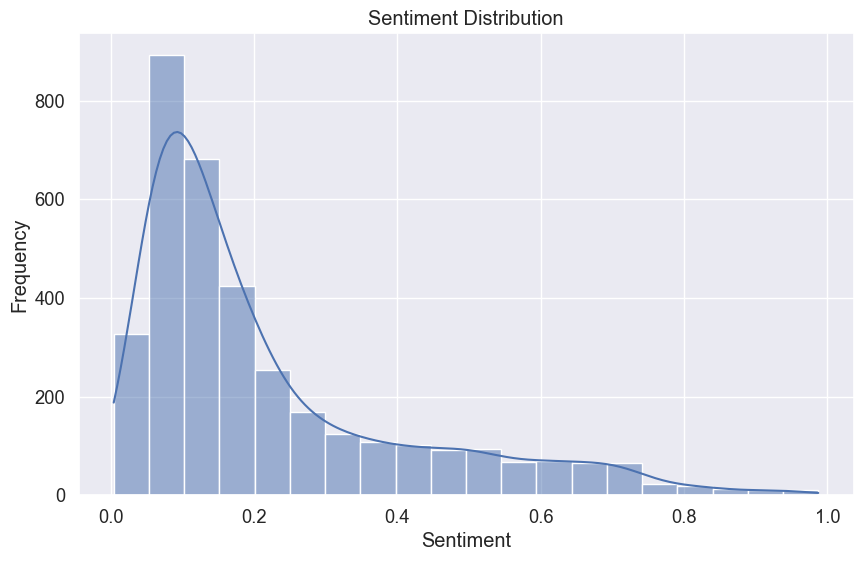

In [19]:
# plot sentiment distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data['Sentiment Score'], bins=20, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


Loading dataset...
Original dataset: 3610 rows

Columns in the dataset:
['Unnamed: 0.1', 'Unnamed: 0', 'Title', 'URL', 'Article_Text', 'Publication Date', 'Source', 'Sentiment Score']

Missing values per column:
Unnamed: 0.1        0
Unnamed: 0          0
Title               0
URL                 0
Article_Text        0
Publication Date    0
Source              0
Sentiment Score     0
dtype: int64
Rows with invalid dates: 0
Dataset after removing invalid dates: 3610 rows
Articles from 2022-2023: 2810 rows

Articles by source (2022-2023):
Source
Guardian     1581
Telegraph     996
BBC           233
Name: count, dtype: int64

Articles by year and month (2022-2023):
Month   1   2    3    4    5    6    7    8    9    10   11  12
Year                                                           
2022    72  62   53   61  141  122  113  168   87  114   95  92
2023   118  85  121  105  140  227  201  162  155  153  163   0

Article length statistics (character count):
count     2810.000000
mean

/var/folders/tz/m04h080x4rgdtp4hkk46mfq40000gn/T/ipykernel_13093/4147736950.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Article_Length'] = df_filtered['Article_Text'].str.len()



Saved visualization to 'articles_by_source_2022_2023.png'

Saved cleaned dataset to 'cleaned_articles_2022_2023.csv'

Summary by source:
          Article_Length                     Sentiment Score            \
                    mean  median  min    max            mean    median   
Source                                                                   
BBC          3387.163090  2961.0  517   8889        0.162711  0.108828   
Guardian     4086.012690  3792.0  545  21279        0.236950  0.157510   
Telegraph    4884.588945  4100.0  500  51081        0.211266  0.142564   

                                       Year  
                min       max article_count  
Source                                       
BBC        0.035185  0.785640           233  
Guardian   0.007445  0.970978          1576  
Telegraph  0.004308  0.987262           995  

Data cleaning complete!


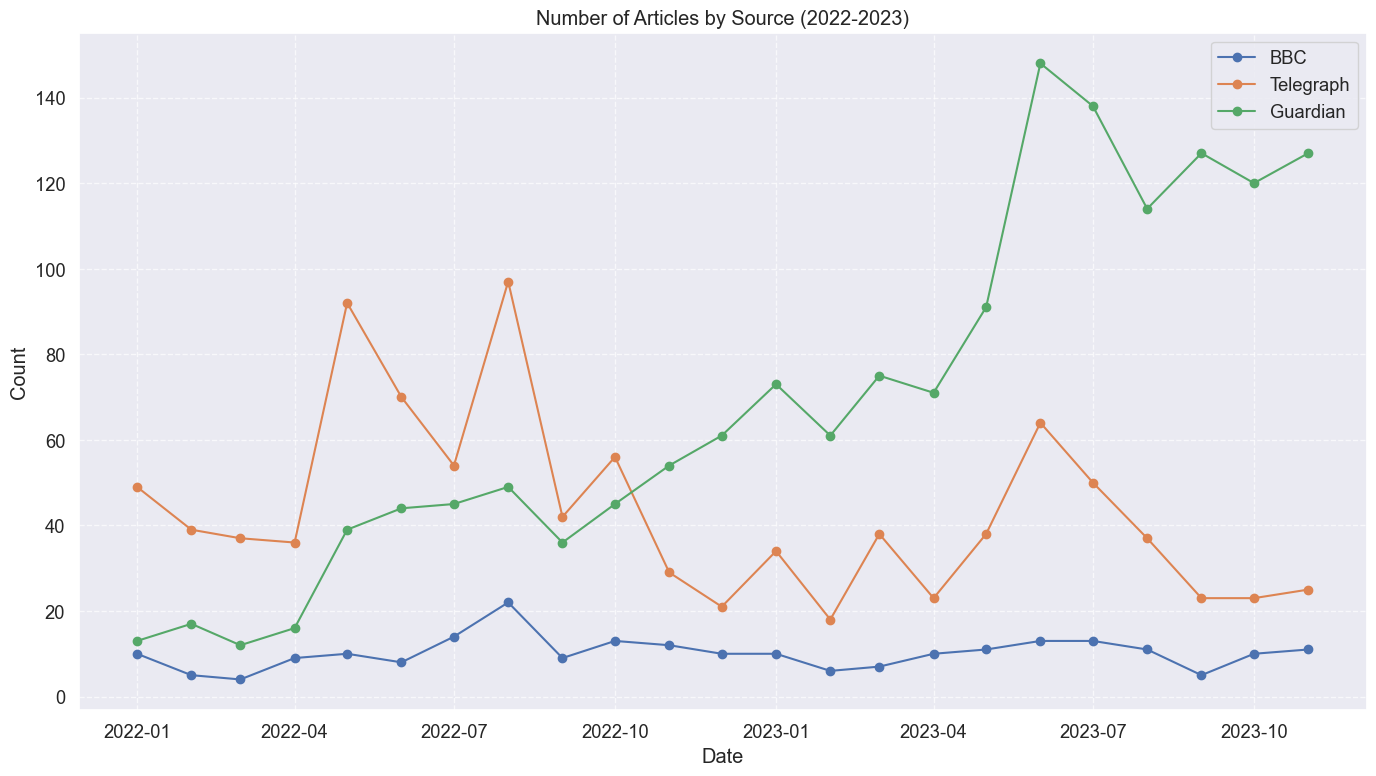

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
plt.style.use('ggplot')
sns.set(font_scale=1.2)

# Load the dataset
print("Loading dataset...")
df = pd.read_csv('data/merged_df_with_sentiment.csv')
print(f"Original dataset: {len(df)} rows")

# Examine the data structure
print("\nColumns in the dataset:")
print(df.columns.tolist())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Convert publication date to datetime
df['Publication Date'] = pd.to_datetime(df['Publication Date'], errors='coerce')
print(f"Rows with invalid dates: {df['Publication Date'].isna().sum()}")

# Drop rows with missing dates
df = df.dropna(subset=['Publication Date'])
print(f"Dataset after removing invalid dates: {len(df)} rows")

# Extract year and month
df['Year'] = df['Publication Date'].dt.year
df['Month'] = df['Publication Date'].dt.month

# Filter for only 2022-2023 articles
df_filtered = df[(df['Year'] >= 2022) & (df['Year'] <= 2023)]
print(f"Articles from 2022-2023: {len(df_filtered)} rows")

# Check distribution by source for filtered data
source_counts = df_filtered['Source'].value_counts()
print("\nArticles by source (2022-2023):")
print(source_counts)

# Check distribution by year and month for filtered data
year_month_counts = df_filtered.groupby(['Year', 'Month']).size().unstack(fill_value=0)
print("\nArticles by year and month (2022-2023):")
print(year_month_counts)

# Check for article length distribution (using character count as proxy)
df_filtered['Article_Length'] = df_filtered['Article_Text'].str.len()
print("\nArticle length statistics (character count):")
print(df_filtered['Article_Length'].describe())

# Check for any outliers - very short articles might be incomplete
short_articles = df_filtered[df_filtered['Article_Length'] < 500]
print(f"\nVery short articles (< 500 chars): {len(short_articles)} rows")

# Examine sentiment distribution
print("\nSentiment score statistics:")
print(df_filtered['Sentiment Score'].describe())

# Check for extreme sentiment values that might be errors
extreme_sentiment = df_filtered[(df_filtered['Sentiment Score'] < 0.01) | (df_filtered['Sentiment Score'] > 0.99)]
print(f"\nArticles with extreme sentiment scores (< 0.01 or > 0.99): {len(extreme_sentiment)} rows")

# Clean data - keep only rows with sufficient text and valid sentiment
df_clean = df_filtered[
    (df_filtered['Article_Length'] >= 500) & 
    (df_filtered['Sentiment Score'] >= 0) &
    (df_filtered['Sentiment Score'] <= 1)
]
print(f"\nFinal clean dataset: {len(df_clean)} rows")

# Visualize the distribution of articles by source and month
plt.figure(figsize=(14, 8))
article_counts = df_clean.groupby(['Year', 'Month', 'Source']).size().reset_index(name='Count')

# Create a proper date column for plotting
article_counts['Date'] = pd.to_datetime(article_counts[['Year', 'Month']].assign(day=1))

# Plot
for source in df_clean['Source'].unique():
    source_data = article_counts[article_counts['Source'] == source]
    plt.plot(source_data['Date'], source_data['Count'], marker='o', label=source)

plt.title('Number of Articles by Source (2022-2023)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('articles_by_source_2022_2023.png', dpi=300, bbox_inches='tight')
print("\nSaved visualization to 'articles_by_source_2022_2023.png'")

# Save the cleaned dataset
df_clean.to_csv('cleaned_articles_2022_2023.csv', index=False)
print("\nSaved cleaned dataset to 'cleaned_articles_2022_2023.csv'")

# Print summary statistics by source
print("\nSummary by source:")
summary = df_clean.groupby('Source').agg({
    'Article_Length': ['mean', 'median', 'min', 'max'],
    'Sentiment Score': ['mean', 'median', 'min', 'max'],
    'Year': 'count'
}).rename(columns={'count': 'article_count'})
print(summary)

print("\nData cleaning complete!")

Loading cleaned dataset...
Dataset contains 2804 articles from 2022-2023

==== BASIC DATASET STATISTICS ====

Articles by source:
Source
Guardian     1576
Telegraph     995
BBC           233
Name: count, dtype: int64

Articles by year:
Year
2022    1179
2023    1625
Name: count, dtype: int64

Articles by month (first 5 rows):
   Year  Month  Count       Date
0  2022      1     72 2022-01-01
1  2022      2     61 2022-02-01
2  2022      3     53 2022-03-01
3  2022      4     61 2022-04-01
4  2022      5    141 2022-05-01

==== TEMPORAL PATTERNS ====
Saved temporal analysis plot

==== ARTICLE LENGTH ANALYSIS ====

Article length statistics (characters):
count     2804.000000
mean      4311.316334
std       2674.481908
min        500.000000
25%       2934.750000
50%       3880.000000
75%       5137.000000
max      51081.000000
Name: Text_Length, dtype: float64

Article length statistics (word count):
count    2804.000000
mean      728.618402
std       453.544794
min        95.000000
25%  

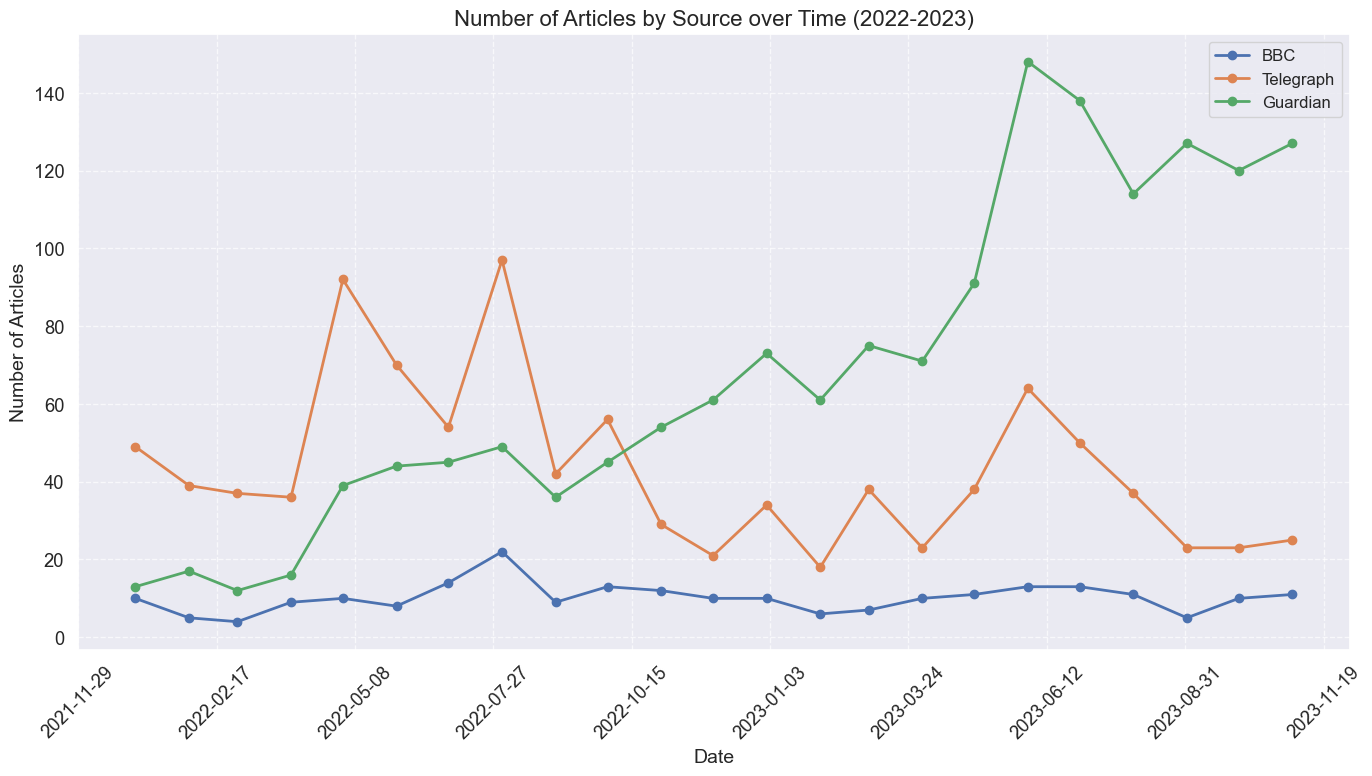

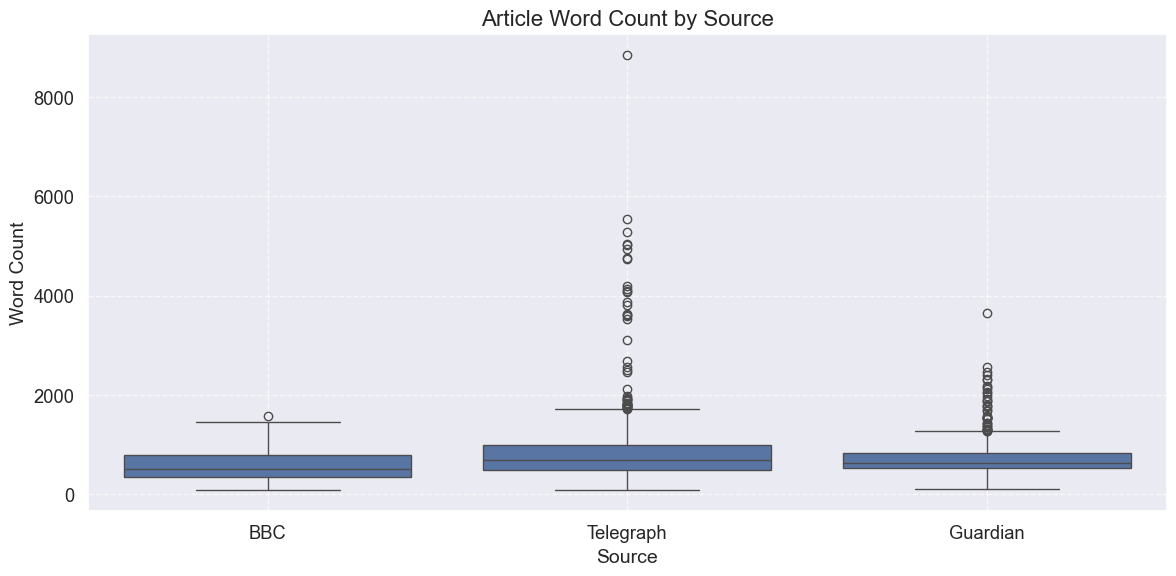

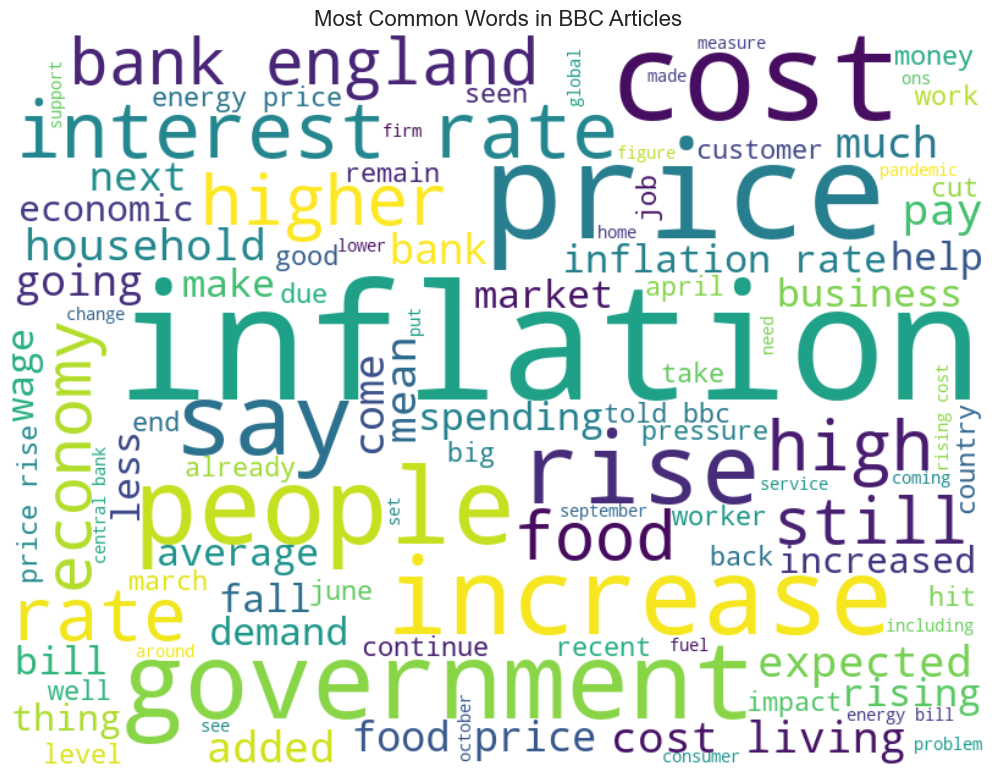

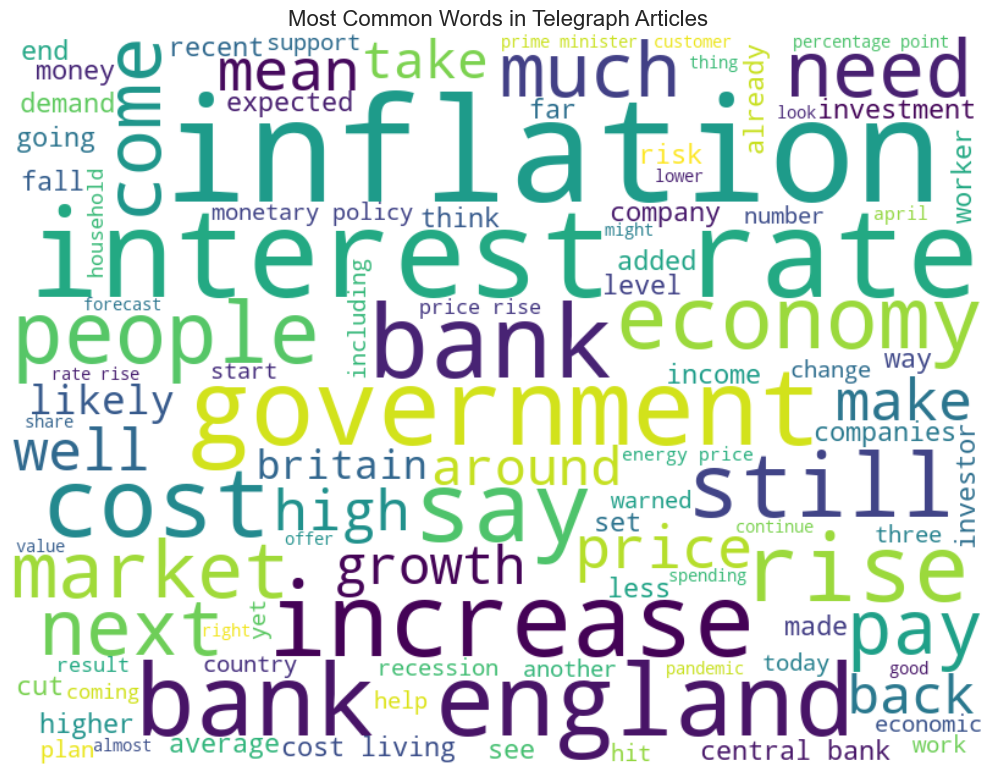

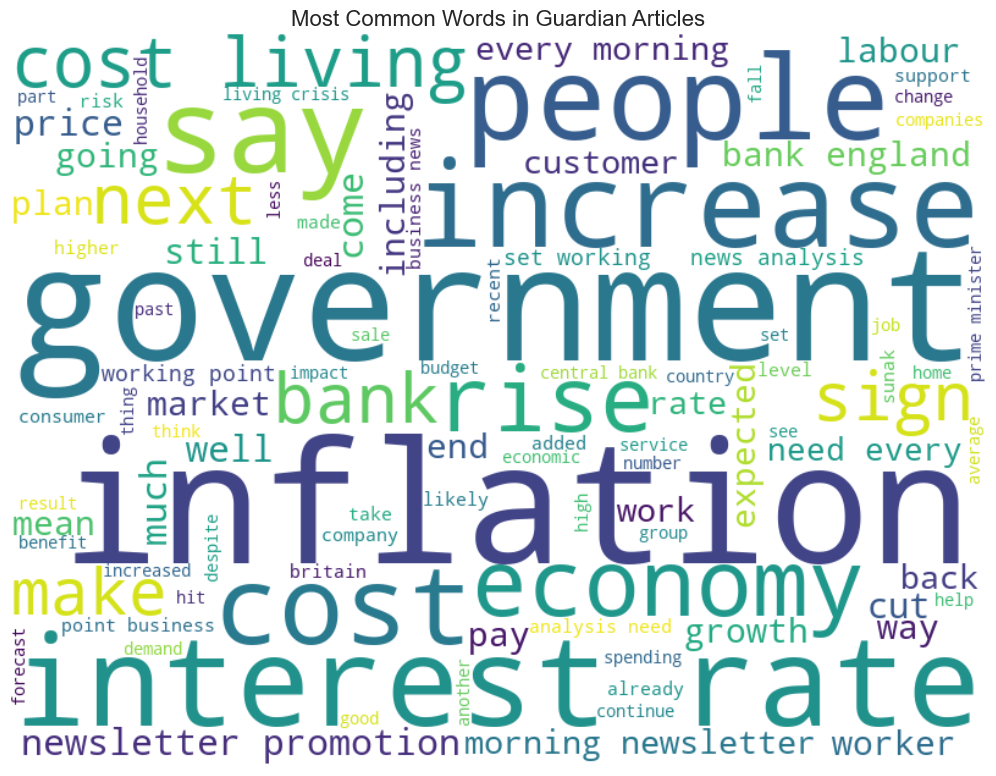

<Figure size 1400x1000 with 0 Axes>

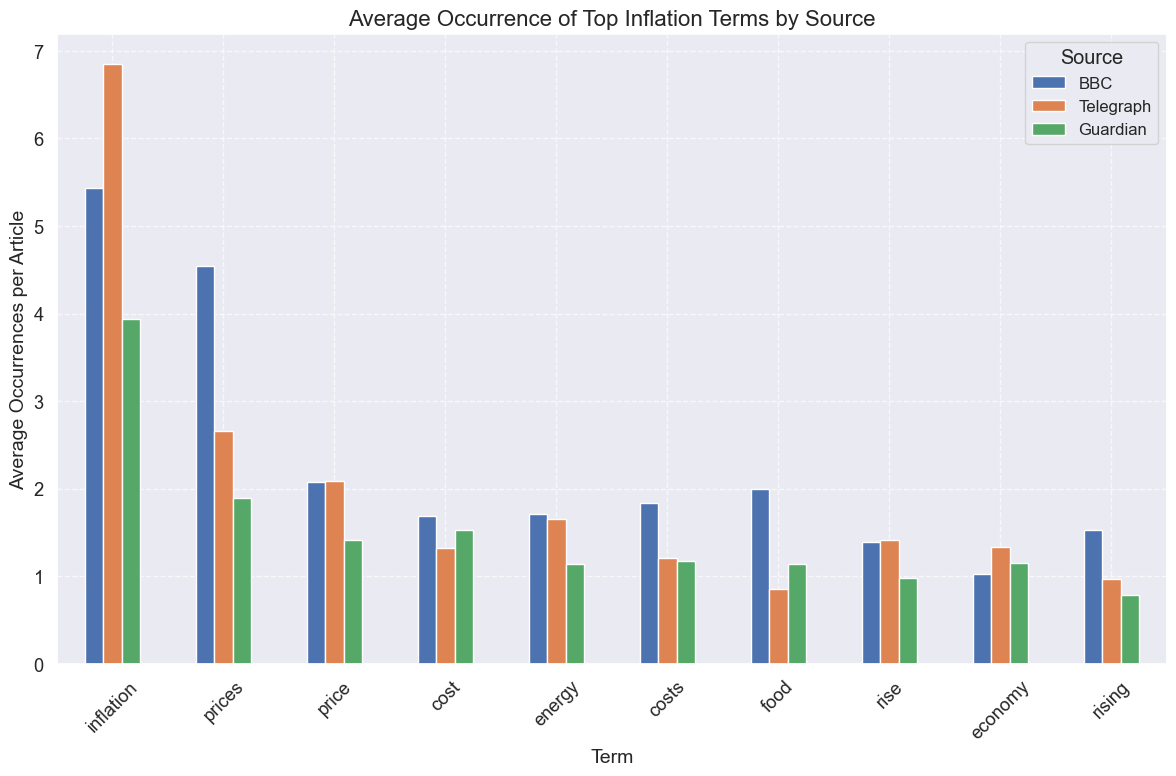

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.ticker as ticker

# Set plotting style
plt.style.use('ggplot')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)

# Load the cleaned dataset
print("Loading cleaned dataset...")
df = pd.read_csv('cleaned_articles_2022_2023.csv')
print(f"Dataset contains {len(df)} articles from 2022-2023")

# 1. BASIC STATISTICS

print("\n==== BASIC DATASET STATISTICS ====")
# Articles by source
source_counts = df['Source'].value_counts()
print("\nArticles by source:")
print(source_counts)

# Articles by year
year_counts = df['Year'].value_counts().sort_index()
print("\nArticles by year:")
print(year_counts)

# Articles by month (overall)
df['Month'] = pd.to_datetime(df['Publication Date']).dt.month
monthly_counts = df.groupby(['Year', 'Month']).size().reset_index(name='Count')
monthly_counts['Date'] = pd.to_datetime(monthly_counts[['Year', 'Month']].assign(day=1))
print("\nArticles by month (first 5 rows):")
print(monthly_counts.head())

# 2. TEMPORAL ANALYSIS

print("\n==== TEMPORAL PATTERNS ====")
# Plot articles by month and source
plt.figure(figsize=(14, 8))

for source in df['Source'].unique():
    source_data = df[df['Source'] == source]
    monthly_data = source_data.groupby(['Year', 'Month']).size().reset_index(name='Count')
    monthly_data['Date'] = pd.to_datetime(monthly_data[['Year', 'Month']].assign(day=1))
    plt.plot(monthly_data['Date'], monthly_data['Count'], marker='o', label=source, linewidth=2)

plt.title('Number of Articles by Source over Time (2022-2023)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(12))  # Show roughly monthly ticks
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('articles_over_time_2022_2023.png', dpi=300, bbox_inches='tight')
print("Saved temporal analysis plot")

# 3. TEXT LENGTH ANALYSIS

print("\n==== ARTICLE LENGTH ANALYSIS ====")
# Calculate text length
df['Text_Length'] = df['Article_Text'].str.len()
df['Word_Count'] = df['Article_Text'].apply(lambda x: len(str(x).split()))

# Basic statistics on article length
print("\nArticle length statistics (characters):")
print(df['Text_Length'].describe())

print("\nArticle length statistics (word count):")
print(df['Word_Count'].describe())

# Compare article length by source
plt.figure(figsize=(12, 6))
sns.boxplot(x='Source', y='Word_Count', data=df)
plt.title('Article Word Count by Source', fontsize=16)
plt.xlabel('Source', fontsize=14)
plt.ylabel('Word Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('article_length_by_source.png', dpi=300, bbox_inches='tight')
print("Saved article length comparison plot")

# 4. VOCABULARY ANALYSIS

print("\n==== VOCABULARY ANALYSIS ====")
# Define function to clean and tokenize text
def clean_and_tokenize(text):
    if not isinstance(text, str):
        return []
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    
    # Split into tokens and remove short words
    tokens = [word for word in text.split() if len(word) > 2]
    
    return tokens

# Define stopwords (simplified without NLTK)
stopwords = set([
    'the', 'and', 'to', 'of', 'a', 'in', 'for', 'is', 'on', 'that', 'by', 'this',
    'with', 'it', 'are', 'as', 'was', 'but', 'be', 'at', 'from', 'has', 'have',
    'had', 'an', 'will', 'they', 'their', 'not', 'which', 'or', 'we', 'you', 
    'one', 'all', 'would', 'there', 'been', 'if', 'more', 'when', 'who', 'what',
    'also', 'said', 'its', 'into', 'than', 'other', 'can', 'only', 'about', 'may',
    'some', 'could', 'should', 'his', 'her', 'our', 'up', 'were', 'out', 'then',
    'time', 'them', 'just', 'such', 'how', 'these', 'any', 'two', 'per', 'cent',
    'now', 'over', 'like', 'even', 'those', 'after', 'first', 'new', 'many',
    'year', 'years', 'last', 'month', 'months', 'week', 'weeks', 'day', 'days'
])

# Tokenize articles and count word frequencies by source
source_vocab = {}
for source in df['Source'].unique():
    source_text = ' '.join(df[df['Source'] == source]['Article_Text'].fillna(''))
    tokens = clean_and_tokenize(source_text)
    tokens = [t for t in tokens if t not in stopwords]
    source_vocab[source] = Counter(tokens)

# Get top words by source
print("\nMost frequent words by source:")
for source, word_counts in source_vocab.items():
    print(f"\n{source} top 20 words:")
    for word, count in word_counts.most_common(20):
        print(f"  {word}: {count}")

# Create wordclouds by source
print("\nGenerating word clouds by source...")
for source in df['Source'].unique():
    plt.figure(figsize=(12, 8))
    
    # Get source text and tokenize
    source_text = ' '.join(df[df['Source'] == source]['Article_Text'].fillna(''))
    tokens = clean_and_tokenize(source_text)
    filtered_text = ' '.join([t for t in tokens if t not in stopwords])
    
    # Generate wordcloud
    wordcloud = WordCloud(width=800, height=600, 
                         background_color='white', 
                         max_words=100, 
                         contour_width=3).generate(filtered_text)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Common Words in {source} Articles', fontsize=16)
    plt.tight_layout()
    plt.savefig(f'wordcloud_{source}.png', dpi=300, bbox_inches='tight')

print("Saved word clouds for each source")

# 5. INFLATION TERM ANALYSIS

print("\n==== INFLATION TERMINOLOGY ANALYSIS ====")
# Define inflation-related terms
inflation_terms = [
    'inflation', 'price', 'prices', 'cost', 'costs', 'expensive', 'rising',
    'increase', 'increases', 'increase', 'rising', 'rise', 'risen',
    'economy', 'economic', 'bank of england', 'interest rate', 'consumer',
    'household', 'spending', 'mortgage', 'energy', 'food', 'crisis'
]

# Count inflation terms by source
inflation_term_counts = {}
for source in df['Source'].unique():
    source_text = ' '.join(df[df['Source'] == source]['Article_Text'].fillna(''))
    source_text = source_text.lower()
    
    # Count occurrences of each term
    term_counts = {}
    for term in inflation_terms:
        # Use regex to find whole words
        count = len(re.findall(r'\b' + re.escape(term) + r'\b', source_text))
        term_counts[term] = count
    
    # Normalize by total article count for the source
    source_article_count = len(df[df['Source'] == source])
    for term in term_counts:
        term_counts[term] = term_counts[term] / source_article_count
    
    inflation_term_counts[source] = term_counts

# Create a DataFrame for easier visualization
inflation_df = pd.DataFrame(inflation_term_counts)
print("\nAverage occurrence of inflation terms per article by source:")
print(inflation_df)

# Visualize top inflation terms
plt.figure(figsize=(14, 10))
top_terms = inflation_df.mean(axis=1).nlargest(10).index
inflation_df.loc[top_terms].plot(kind='bar')
plt.title('Average Occurrence of Top Inflation Terms by Source', fontsize=16)
plt.xlabel('Term', fontsize=14)
plt.ylabel('Average Occurrences per Article', fontsize=14)
plt.legend(title='Source', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('inflation_terms_by_source.png', dpi=300, bbox_inches='tight')
print("Saved inflation terminology analysis plot")

# 6. HEADLINE ANALYSIS

print("\n==== HEADLINE ANALYSIS ====")
# Analyze headline length
df['Headline_Length'] = df['Title'].str.len()
df['Headline_Word_Count'] = df['Title'].apply(lambda x: len(str(x).split()))

print("\nHeadline length statistics:")
print(df.groupby('Source')['Headline_Word_Count'].describe())

# Find most common words in headlines
headline_words_by_source = {}
for source in df['Source'].unique():
    headline_text = ' '.join(df[df['Source'] == source]['Title'].fillna(''))
    tokens = clean_and_tokenize(headline_text)
    tokens = [t for t in tokens if t not in stopwords]
    headline_words_by_source[source] = Counter(tokens)

print("\nMost frequent words in headlines by source:")
for source, word_counts in headline_words_by_source.items():
    print(f"\n{source} top 15 headline words:")
    for word, count in word_counts.most_common(15):
        print(f"  {word}: {count}")

# Check for common headline patterns
print("\nLooking for common headline patterns...")
for source in df['Source'].unique():
    headlines = df[df['Source'] == source]['Title'].tolist()
    
    # Check for question headlines
    question_headlines = [h for h in headlines if '?' in str(h)]
    pct_questions = len(question_headlines) / len(headlines) * 100 if headlines else 0
    
    # Check for number headlines (starting with number)
    number_pattern = re.compile(r'^\d+')
    number_headlines = [h for h in headlines if number_pattern.match(str(h))]
    pct_numbers = len(number_headlines) / len(headlines) * 100 if headlines else 0
    
    print(f"\n{source} headline patterns:")
    print(f"  Question headlines: {len(question_headlines)} ({pct_questions:.1f}%)")
    print(f"  Number-led headlines: {len(number_headlines)} ({pct_numbers:.1f}%)")
    print(f"  Average headline length: {df[df['Source'] == source]['Headline_Word_Count'].mean():.1f} words")

print("\nExploratory data analysis complete!")

Loading cleaned dataset...
Dataset contains 2804 articles from 2022-2023

==== ARTICLE COUNT OVER TIME ====
Generated visualizations for article counts over time

Quarterly article counts:
Source        BBC  Guardian  Telegraph
Year Quarter                          
2022 1         19        42        125
     2         27        99        198
     3         45       130        193
     4         35       160        106
2023 1         23       209         90
     2         34       310        125
     3         29       379        110
     4         21       247         48

==== MOST FREQUENT WORDS ANALYSIS ====

Top 10 words across ALL articles by quarter:

2023-Q4 top 10 words:
  inflation: 1150
  government: 682
  tax: 654
  prices: 565
  rates: 537
  people: 533
  rate: 464
  next: 441
  bank: 420
  growth: 416

2023-Q3 top 10 words:
  inflation: 2151
  rates: 1085
  prices: 955
  bank: 949
  rate: 914
  government: 875
  interest: 765
  price: 698
  people: 645
  higher: 617

2023-

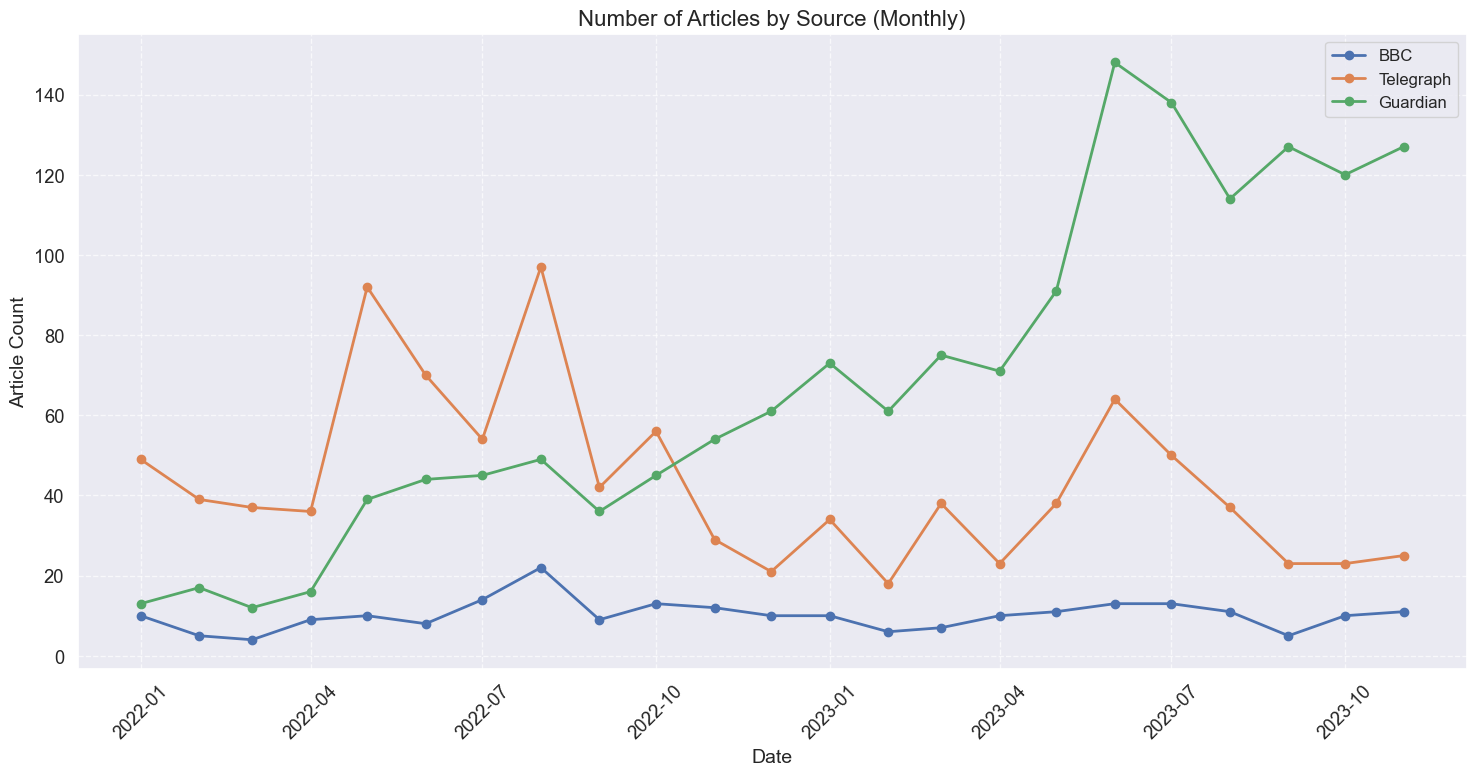

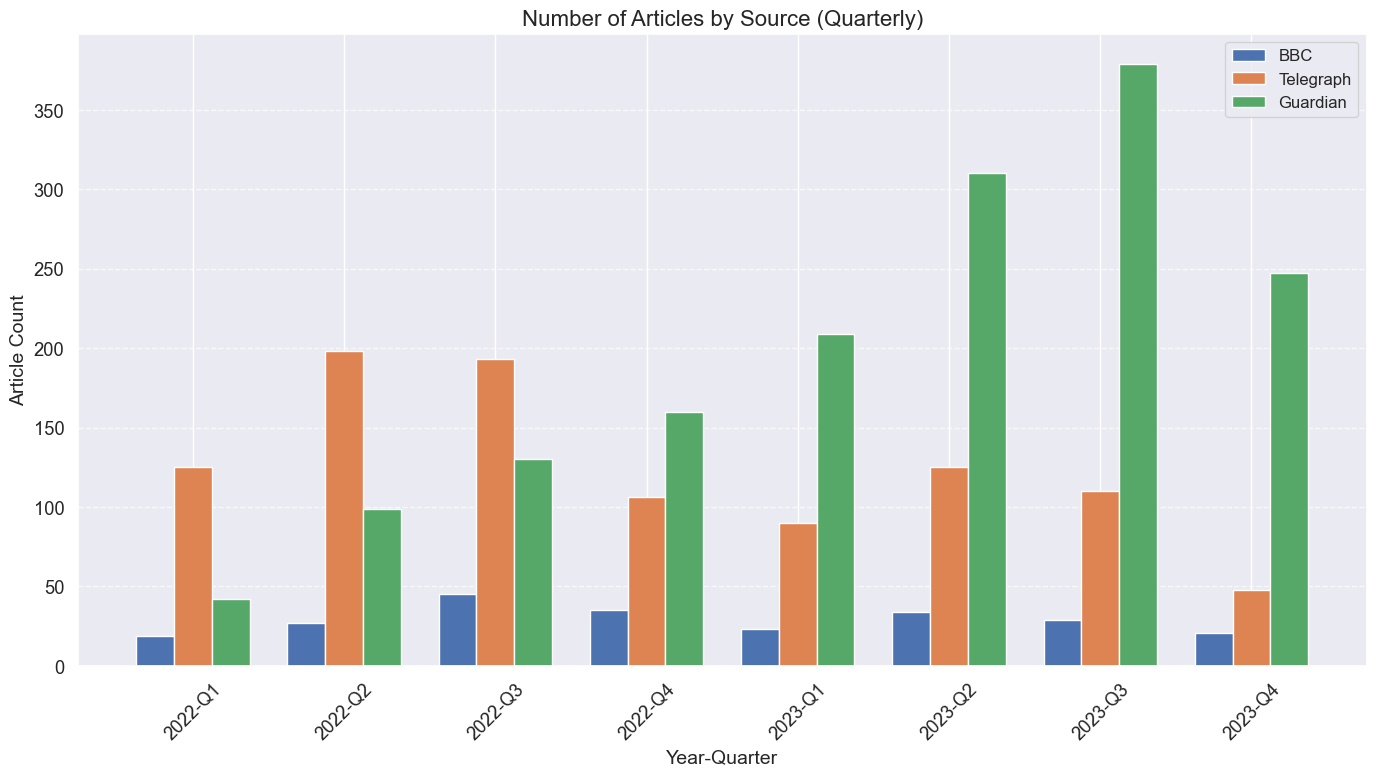

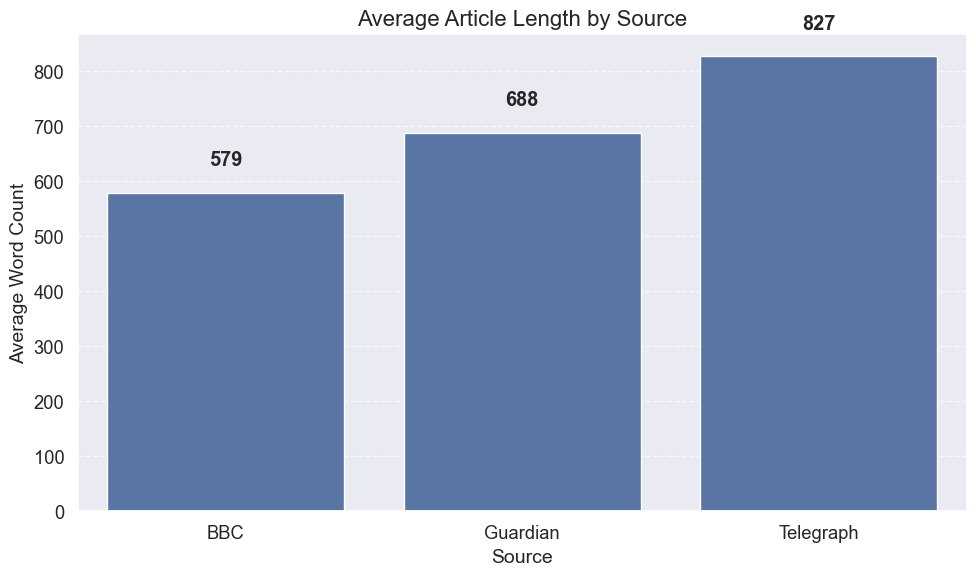

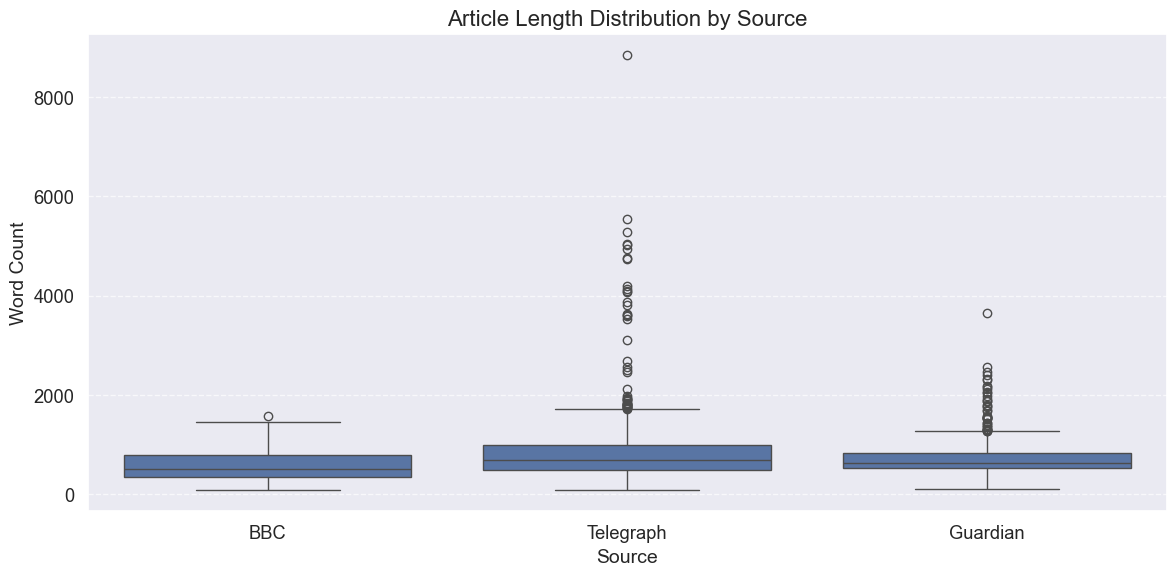

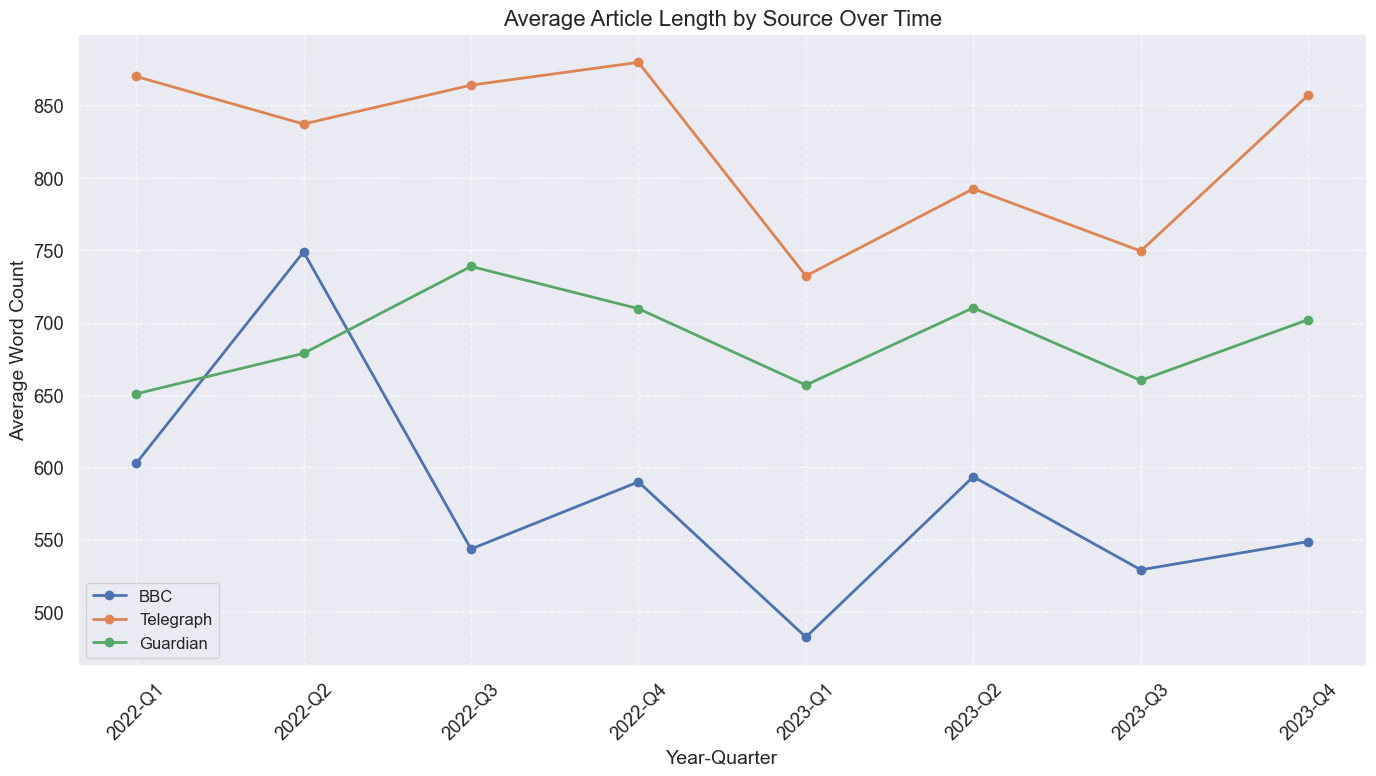

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import calendar
from matplotlib.ticker import MaxNLocator

# Set plotting style
plt.style.use('ggplot')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)

# Load the cleaned dataset
print("Loading cleaned dataset...")
df = pd.read_csv('cleaned_articles_2022_2023.csv')
print(f"Dataset contains {len(df)} articles from 2022-2023")

# Convert publication date to datetime
df['Publication Date'] = pd.to_datetime(df['Publication Date'])
df['Year'] = df['Publication Date'].dt.year
df['Month'] = df['Publication Date'].dt.month

# Add quarter information
df['Quarter'] = df['Publication Date'].dt.quarter
df['YearQuarter'] = df['Year'].astype(str) + '-Q' + df['Quarter'].astype(str)

# 1. ARTICLE COUNT OVER TIME

print("\n==== ARTICLE COUNT OVER TIME ====")

# Monthly counts by source
monthly_counts = df.groupby(['Year', 'Month', 'Source']).size().reset_index(name='Count')
monthly_counts['Date'] = pd.to_datetime(monthly_counts[['Year', 'Month']].assign(day=1))
monthly_counts['Month_Name'] = monthly_counts['Date'].dt.strftime('%b')
monthly_counts['YearMonth'] = monthly_counts['Year'].astype(str) + '-' + monthly_counts['Month_Name']

# Plot monthly counts
plt.figure(figsize=(15, 8))
for source in df['Source'].unique():
    source_data = monthly_counts[monthly_counts['Source'] == source]
    plt.plot(source_data['Date'], source_data['Count'], marker='o', label=source, linewidth=2)

plt.title('Number of Articles by Source (Monthly)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Article Count', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('article_count_monthly.png', dpi=300, bbox_inches='tight')

# Quarterly counts by source
quarterly_counts = df.groupby(['Year', 'Quarter', 'Source']).size().reset_index(name='Count')
quarterly_counts['YearQuarter'] = quarterly_counts['Year'].astype(str) + '-Q' + quarterly_counts['Quarter'].astype(str)

# Create a pivoted table for quarterly counts
quarterly_pivot = quarterly_counts.pivot_table(
    index='YearQuarter', 
    columns='Source', 
    values='Count',
    fill_value=0
).reset_index()

# Sort by year and quarter
quarterly_pivot = quarterly_pivot.sort_values('YearQuarter')

# Plot quarterly counts
plt.figure(figsize=(14, 8))
x = range(len(quarterly_pivot))
width = 0.25  # width of bars
sources = df['Source'].unique()

for i, source in enumerate(sources):
    plt.bar([pos + i*width for pos in x], 
           quarterly_pivot[source], 
           width=width,
           label=source)

plt.title('Number of Articles by Source (Quarterly)', fontsize=16)
plt.xlabel('Year-Quarter', fontsize=14)
plt.ylabel('Article Count', fontsize=14)
plt.xticks([pos + width for pos in x], quarterly_pivot['YearQuarter'], rotation=45)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.tight_layout()
plt.savefig('article_count_quarterly.png', dpi=300, bbox_inches='tight')

print("Generated visualizations for article counts over time")
print("\nQuarterly article counts:")
quarterly_table = quarterly_counts.pivot_table(
    index=['Year', 'Quarter'],
    columns='Source',
    values='Count',
    aggfunc='sum',
    fill_value=0
)
print(quarterly_table)

# 2 & 3. MOST FREQUENT WORDS BY QUARTER AND SOURCE

print("\n==== MOST FREQUENT WORDS ANALYSIS ====")

# Function to clean and tokenize text
def clean_and_tokenize(text):
    if not isinstance(text, str):
        return []
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    
    # Split into tokens and remove short words
    tokens = [word for word in text.split() if len(word) > 2]
    
    return tokens

# Define stopwords (simplified without NLTK)
stopwords = set([
    'the', 'and', 'to', 'of', 'a', 'in', 'for', 'is', 'on', 'that', 'by', 'this',
    'with', 'it', 'are', 'as', 'was', 'but', 'be', 'at', 'from', 'has', 'have',
    'had', 'an', 'will', 'they', 'their', 'not', 'which', 'or', 'we', 'you', 
    'one', 'all', 'would', 'there', 'been', 'if', 'more', 'when', 'who', 'what',
    'also', 'said', 'its', 'into', 'than', 'other', 'can', 'only', 'about', 'may',
    'some', 'could', 'should', 'his', 'her', 'our', 'up', 'were', 'out', 'then',
    'time', 'them', 'just', 'such', 'how', 'these', 'any', 'two', 'per', 'cent',
    'now', 'over', 'like', 'even', 'those', 'after', 'first', 'new', 'many',
    'year', 'years', 'last', 'month', 'months', 'week', 'weeks', 'day', 'days'
])

# Get top words for ALL articles by quarter
print("\nTop 10 words across ALL articles by quarter:")
quarterly_words = {}

for quarter in df['YearQuarter'].unique():
    quarter_text = ' '.join(df[df['YearQuarter'] == quarter]['Article_Text'].fillna(''))
    tokens = clean_and_tokenize(quarter_text)
    tokens = [t for t in tokens if t not in stopwords]
    
    word_counts = Counter(tokens)
    top_words = word_counts.most_common(10)
    quarterly_words[quarter] = top_words
    
    print(f"\n{quarter} top 10 words:")
    for word, count in top_words:
        print(f"  {word}: {count}")

# Get top words by source and quarter
print("\nTop 10 words by source and quarter:")
source_quarterly_words = {}

for source in df['Source'].unique():
    source_quarterly_words[source] = {}
    
    for quarter in df['YearQuarter'].unique():
        # Filter data for this source and quarter
        quarter_source_df = df[(df['Source'] == source) & (df['YearQuarter'] == quarter)]
        
        # Skip if no articles
        if len(quarter_source_df) == 0:
            continue
        
        quarter_text = ' '.join(quarter_source_df['Article_Text'].fillna(''))
        tokens = clean_and_tokenize(quarter_text)
        tokens = [t for t in tokens if t not in stopwords]
        
        word_counts = Counter(tokens)
        top_words = word_counts.most_common(10)
        source_quarterly_words[source][quarter] = top_words
        
        print(f"\n{source} - {quarter} top 10 words:")
        for word, count in top_words:
            print(f"  {word}: {count}")

# 4. AVERAGE ARTICLE LENGTH BY SOURCE

print("\n==== ARTICLE LENGTH ANALYSIS ====")

# Calculate text length
df['Word_Count'] = df['Article_Text'].apply(lambda x: len(str(x).split()))

# Get average length by source
avg_length_by_source = df.groupby('Source')['Word_Count'].agg(['mean', 'median', 'min', 'max', 'count'])
print("\nArticle length statistics by source (word count):")
print(avg_length_by_source)

# Plot average article length
plt.figure(figsize=(10, 6))
avg_length = df.groupby('Source')['Word_Count'].mean().reset_index()
sns.barplot(x='Source', y='Word_Count', data=avg_length)
plt.title('Average Article Length by Source', fontsize=16)
plt.xlabel('Source', fontsize=14)
plt.ylabel('Average Word Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

# Add value labels on the bars
for i, v in enumerate(avg_length['Word_Count']):
    plt.text(i, v + 50, f"{int(v)}", ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('avg_article_length_by_source.png', dpi=300, bbox_inches='tight')

# Plot article length distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='Source', y='Word_Count', data=df)
plt.title('Article Length Distribution by Source', fontsize=16)
plt.xlabel('Source', fontsize=14)
plt.ylabel('Word Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.tight_layout()
plt.savefig('article_length_distribution_by_source.png', dpi=300, bbox_inches='tight')

# Average length by source and quarter
length_by_source_quarter = df.groupby(['Source', 'YearQuarter'])['Word_Count'].mean().reset_index()

# Plot length over time
plt.figure(figsize=(14, 8))
for source in df['Source'].unique():
    source_data = length_by_source_quarter[length_by_source_quarter['Source'] == source]
    plt.plot(source_data['YearQuarter'], source_data['Word_Count'], marker='o', label=source, linewidth=2)

plt.title('Average Article Length by Source Over Time', fontsize=16)
plt.xlabel('Year-Quarter', fontsize=14)
plt.ylabel('Average Word Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('article_length_over_time.png', dpi=300, bbox_inches='tight')

print("\nGenerated visualizations for article length analysis")
print("\nExploratory data analysis complete!")

Loading dataset...
Dataset contains 2804 articles

==== ARTICLE COUNT ANALYSIS ====

Articles by source:
Source
Guardian     1576
Telegraph     995
BBC           233
Name: count, dtype: int64

Articles by quarter and source:
Source         BBC  Guardian  Telegraph  Total
Year  Quarter                                 
2022  1         19        42        125    186
      2         27        99        198    324
      3         45       130        193    368
      4         35       160        106    301
2023  1         23       209         90    322
      2         34       310        125    469
      3         29       379        110    518
      4         21       247         48    316
Total          233      1576        995   2804
Saved article count visualization

==== SENTIMENT ANALYSIS ====
Using existing sentiment scores

Sentiment statistics by source:
            mean  median    std
Source                         
BBC        0.163   0.109  0.142
Guardian   0.237   0.158  0.198
T

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/maxwellfilip-turner/nltk_data'
    - '/opt/anaconda3/envs/ds202/nltk_data'
    - '/opt/anaconda3/envs/ds202/share/nltk_data'
    - '/opt/anaconda3/envs/ds202/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


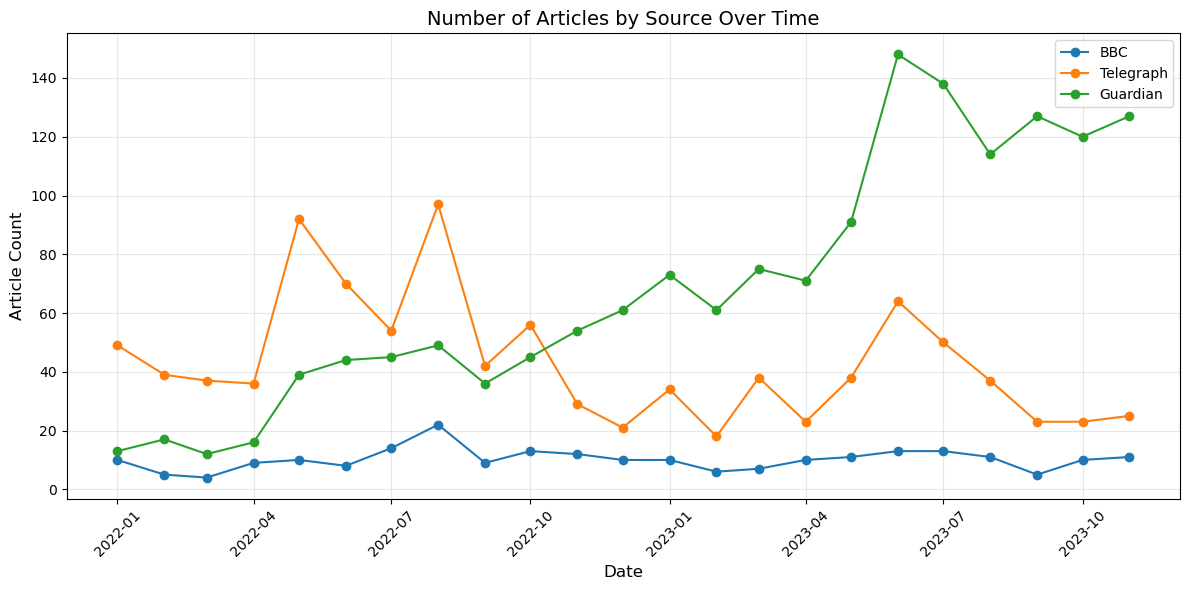

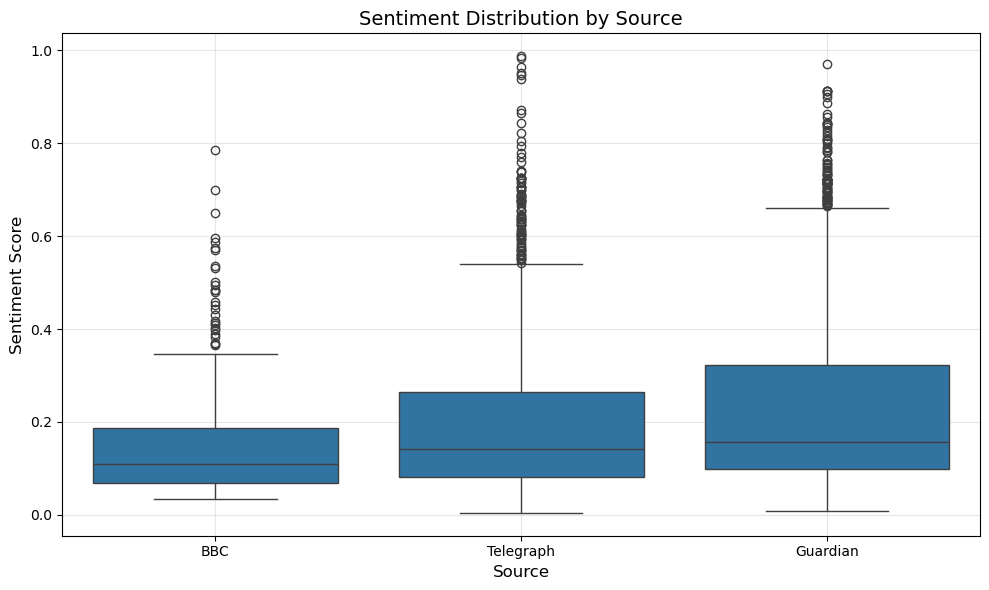

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Make sure we have the NLTK data we need
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('vader_lexicon')

# Load the dataset
print("Loading dataset...")
df = pd.read_csv('data/cleaned_articles_2022_2023.csv')
print(f"Dataset contains {len(df)} articles")

# Check if we need to preprocess dates
if not pd.api.types.is_datetime64_any_dtype(df['Publication Date']):
    df['Publication Date'] = pd.to_datetime(df['Publication Date'])

# Add year, month, quarter information
df['Year'] = df['Publication Date'].dt.year
df['Month'] = df['Publication Date'].dt.month
df['Quarter'] = df['Publication Date'].dt.quarter
df['YearQuarter'] = df['Year'].astype(str) + '-Q' + df['Quarter'].astype(str)

# 1. ARTICLE COUNT ANALYSIS
print("\n==== ARTICLE COUNT ANALYSIS ====")
# Count by source
source_counts = df['Source'].value_counts()
print("\nArticles by source:")
print(source_counts)

# Count by quarter and source
quarterly_counts = pd.crosstab(
    [df['Year'], df['Quarter']], 
    df['Source'], 
    margins=True, 
    margins_name='Total'
)
print("\nArticles by quarter and source:")
print(quarterly_counts)

# Plot article counts by source over time
plt.figure(figsize=(12, 6))
monthly_data = df.groupby(['Year', 'Month', 'Source']).size().reset_index(name='Count')
monthly_data['Date'] = pd.to_datetime(monthly_data[['Year', 'Month']].assign(day=1))

for source in df['Source'].unique():
    source_data = monthly_data[monthly_data['Source'] == source]
    plt.plot(source_data['Date'], source_data['Count'], marker='o', label=source)

plt.title('Number of Articles by Source Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Article Count', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('article_counts_by_time.png', dpi=300)
print("Saved article count visualization")

# 2. SENTIMENT ANALYSIS
print("\n==== SENTIMENT ANALYSIS ====")
# Use NLTK's built-in VADER sentiment analyzer
nltk_sia = SentimentIntensityAnalyzer()

# Check if we need to calculate sentiment
if 'Sentiment Score' not in df.columns:
    print("Calculating sentiment scores...")
    df['NLTK_Sentiment'] = df['Article_Text'].apply(
        lambda x: nltk_sia.polarity_scores(str(x))['compound']
    )
else:
    # Use existing sentiment scores
    print("Using existing sentiment scores")
    df['NLTK_Sentiment'] = df['Sentiment Score']

# Calculate average sentiment by source
sentiment_by_source = df.groupby('Source')['NLTK_Sentiment'].agg(['mean', 'median', 'std']).round(3)
print("\nSentiment statistics by source:")
print(sentiment_by_source)

# Plot sentiment distribution by source
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source', y='NLTK_Sentiment', data=df)
plt.title('Sentiment Distribution by Source', fontsize=14)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('sentiment_by_source.png', dpi=300)
print("Saved sentiment visualization")

# 3. BASIC TEXT PREPROCESSING FOR TOPIC MODELING
print("\n==== TEXT PREPROCESSING FOR ANALYSIS ====")
# Define stopwords
stop_words = set(stopwords.words('english'))
# Add custom stopwords
custom_stopwords = {
    'says', 'said', 'mr', 'ms', 'mrs', 'told', 'according', 'reported',
    'reuters', 'afp', 'ap', 'would', 'could', 'may', 'might', 'also',
    'year', 'years', 'month', 'months', 'day', 'days', 'time', 'today',
    'yesterday', 'week', 'weeks', 'however', 'despite', 'although'
}
stop_words.update(custom_stopwords)

# Text preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        return []
    
    # Lowercase and remove punctuation
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords and short words
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    
    return tokens

# Apply preprocessing
print("Processing text for analysis...")
df['Tokens'] = df['Article_Text'].apply(preprocess_text)
df['Token_Count'] = df['Tokens'].apply(len)

# 4. TOPIC MODELING WITH GENSIM LDA
print("\n==== TOPIC MODELING ====")
# Prepare corpus
print("Preparing corpus for topic modeling...")
dictionary = corpora.Dictionary(df['Tokens'])
# Filter extremes (adjust parameters as needed)
dictionary.filter_extremes(no_below=5, no_above=0.7)
corpus = [dictionary.doc2bow(text) for text in df['Tokens']]

# Find optimal number of topics
coherence_scores = []
num_topics_range = range(5, 16, 5)  # Try 5, 10, 15 topics

for num_topics in num_topics_range:
    print(f"Testing LDA model with {num_topics} topics...")
    lda_model = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        passes=10,
        alpha='auto',
        random_state=42
    )
    
    coherence_model = CoherenceModel(
        model=lda_model, 
        texts=df['Tokens'],
        dictionary=dictionary, 
        coherence='c_v'
    )
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)
    print(f"Coherence score: {coherence_score:.4f}")

# Find best number of topics
best_num_topics = num_topics_range[np.argmax(coherence_scores)]
print(f"\nBest number of topics: {best_num_topics}")

# Train final LDA model
print(f"Training final LDA model with {best_num_topics} topics...")
final_lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=best_num_topics,
    passes=10,
    alpha='auto',
    random_state=42
)

# Print topics
print("\nTop terms for each topic:")
for idx, topic in final_lda_model.print_topics(num_words=10):
    print(f"Topic #{idx}: {topic}")

# Get topic distribution for each document
topic_distributions = []
for i, bow in enumerate(corpus):
    topics = final_lda_model.get_document_topics(bow)
    # Get dominant topic
    dominant_topic = max(topics, key=lambda x: x[1]) if topics else (-1, 0)
    topic_distributions.append({
        'doc_id': i,
        'dominant_topic': dominant_topic[0],
        'dominant_topic_prob': dominant_topic[1],
        'topics': topics
    })

# Add dominant topic to dataframe
df['Dominant_Topic'] = [item['dominant_topic'] for item in topic_distributions]
df['Dominant_Topic_Prob'] = [item['dominant_topic_prob'] for item in topic_distributions]

# Analyze topic distribution by source
topic_by_source = pd.crosstab(
    df['Dominant_Topic'], 
    df['Source'], 
    normalize='columns'
).round(3) * 100

print("\nTopic distribution by source (%):")
print(topic_by_source)

# Plot topic distribution by source
plt.figure(figsize=(12, 8))
topic_by_source.plot(kind='bar')
plt.title('Topic Distribution by Source', fontsize=14)
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Percentage of Articles', fontsize=12)
plt.legend(title='Source')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('topic_by_source.png', dpi=300)
print("Saved topic distribution visualization")

# 5. BASIC FRAME ANALYSIS WITH KEYWORD DICTIONARIES
print("\n==== FRAME ANALYSIS ====")
# Define frame dictionaries (based on common frames for inflation coverage)
frames = {
    'economic_impact': [
        'economy', 'growth', 'recession', 'gdp', 'economic', 'market', 'markets',
        'investment', 'business', 'trade', 'sector', 'industry', 'industries',
        'financial', 'stock', 'stocks', 'investor', 'investors'
    ],
    
    'cost_of_living': [
        'cost', 'costs', 'price', 'prices', 'expensive', 'afford', 'affordable',
        'household', 'households', 'family', 'families', 'consumer', 'consumers',
        'bill', 'bills', 'shopping', 'energy', 'food', 'petrol', 'mortgage', 'rent'
    ],
    
    'policy_response': [
        'policy', 'policies', 'bank', 'central', 'interest', 'rate', 'rates',
        'monetary', 'fiscal', 'budget', 'treasury', 'chancellor', 'government',
        'minister', 'regulation', 'tax', 'taxes', 'spending', 'stimulus'
    ],
    
    'political': [
        'election', 'vote', 'voter', 'voters', 'political', 'politics', 'party',
        'conservative', 'labour', 'tory', 'tories', 'opposition', 'campaign',
        'mp', 'parliament', 'politician', 'politicians', 'sunak', 'starmer'
    ],
    
    'global_factors': [
        'global', 'international', 'world', 'worldwide', 'foreign', 'abroad',
        'europe', 'european', 'china', 'russia', 'ukraine', 'war', 'pandemic',
        'covid', 'supply', 'chain', 'shortage', 'shortages', 'climate'
    ]
}

# Function to detect frames in text
def detect_frames(tokens, frames):
    # Convert all frame terms to lowercase for matching
    frame_terms = {
        frame: [term.lower() for term in terms]
        for frame, terms in frames.items()
    }
    
    # Count matches for each frame
    frame_counts = {}
    for frame, terms in frame_terms.items():
        # Create a set for faster lookup
        term_set = set(terms)
        # Count matches
        matches = sum(1 for token in tokens if token in term_set)
        # Calculate percentage
        percentage = matches / len(tokens) if tokens else 0
        frame_counts[frame] = {
            'count': matches,
            'percentage': percentage
        }
    
    # Determine dominant frame
    if frame_counts:
        dominant_frame = max(frame_counts.items(), key=lambda x: x[1]['count'])
        return {
            'frame_counts': frame_counts,
            'dominant_frame': dominant_frame[0]
        }
    else:
        return {
            'frame_counts': frame_counts,
            'dominant_frame': 'none'
        }

# Apply frame detection
print("Detecting frames in articles...")
frame_results = df['Tokens'].apply(lambda x: detect_frames(x, frames))

# Extract frame data
df['Dominant_Frame'] = frame_results.apply(lambda x: x['dominant_frame'])

# Extract frame percentages
for frame in frames.keys():
    df[f'Frame_{frame}'] = frame_results.apply(
        lambda x: x['frame_counts'][frame]['percentage']
    )

# Analyze frame distribution by source
frame_by_source = pd.crosstab(
    df['Dominant_Frame'], 
    df['Source'], 
    normalize='columns'
).round(3) * 100

print("\nDominant frame distribution by source (%):")
print(frame_by_source)

# Plot frame distribution
plt.figure(figsize=(12, 8))
frame_by_source.plot(kind='bar')
plt.title('Dominant Frame Distribution by Source', fontsize=14)
plt.xlabel('Frame', fontsize=12)
plt.ylabel('Percentage of Articles', fontsize=12)
plt.legend(title='Source')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('frame_by_source.png', dpi=300)
print("Saved frame distribution visualization")

# Calculate average frame percentages by source
frame_pct_cols = [col for col in df.columns if col.startswith('Frame_')]
frame_pct_by_source = df.groupby('Source')[frame_pct_cols].mean().round(4) * 100

# Rename columns for clarity
renamed_cols = {col: col.replace('Frame_', '') for col in frame_pct_cols}
frame_pct_by_source = frame_pct_by_source.rename(columns=renamed_cols)

print("\nAverage frame percentages by source:")
print(frame_pct_by_source)

# Plot frame percentages by source
plt.figure(figsize=(12, 8))
frame_pct_by_source.plot(kind='bar')
plt.title('Average Frame Percentages by Source', fontsize=14)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Average Percentage', fontsize=12)
plt.legend(title='Frame')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('frame_percentages.png', dpi=300)
print("Saved frame percentages visualization")

# 6. COMBINED ANALYSIS: SENTIMENT BY FRAME AND SOURCE
print("\n==== SENTIMENT BY FRAME AND SOURCE ====")
# Calculate average sentiment by frame and source
sentiment_by_frame_source = df.groupby(['Dominant_Frame', 'Source'])['NLTK_Sentiment'].mean().unstack().round(3)
print("\nAverage sentiment by frame and source:")
print(sentiment_by_frame_source)

# Plot heatmap of sentiment by frame and source
plt.figure(figsize=(10, 8))
sns.heatmap(
    sentiment_by_frame_source, 
    annot=True, 
    cmap='RdBu_r', 
    center=0, 
    cbar_kws={'label': 'Average Sentiment Score'}
)
plt.title('Average Sentiment by Frame and Source', fontsize=14)
plt.tight_layout()
plt.savefig('sentiment_by_frame_source.png', dpi=300)
print("Saved sentiment by frame and source visualization")

# 7. TEMPORAL ANALYSIS OF FRAMES
print("\n==== TEMPORAL ANALYSIS OF FRAMES ====")
# Calculate frame percentages by quarter and source
frame_by_quarter = df.groupby(['YearQuarter', 'Source'])[frame_pct_cols].mean().round(4) * 100
frame_by_quarter = frame_by_quarter.rename(columns=renamed_cols)

# Plot economic impact frame over time
plt.figure(figsize=(12, 8))
for source in df['Source'].unique():
    source_data = frame_by_quarter.loc[frame_by_quarter.index.get_level_values('Source') == source]
    plt.plot(
        source_data.index.get_level_values('YearQuarter'), 
        source_data['economic_impact'], 
        marker='o', 
        label=source
    )

plt.title('Economic Impact Frame by Source Over Time', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Frame Percentage', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('economic_impact_frame_time.png', dpi=300)
print("Saved temporal frame analysis visualization")

print("\nAnalysis complete! All visualizations saved.")

Loading dataset...
Dataset contains 2804 articles

==== ARTICLE COUNT ANALYSIS ====

Articles by source:
Source
Guardian     1576
Telegraph     995
BBC           233
Name: count, dtype: int64

Articles by quarter and source:
Source         BBC  Guardian  Telegraph  Total
Year  Quarter                                 
2022  1         19        42        125    186
      2         27        99        198    324
      3         45       130        193    368
      4         35       160        106    301
2023  1         23       209         90    322
      2         34       310        125    469
      3         29       379        110    518
      4         21       247         48    316
Total          233      1576        995   2804
Saved article count visualization

==== SENTIMENT ANALYSIS ====
Using existing sentiment scores

Sentiment statistics by source:
            mean  median    std
Source                         
BBC        0.163   0.109  0.142
Guardian   0.237   0.158  0.198
T

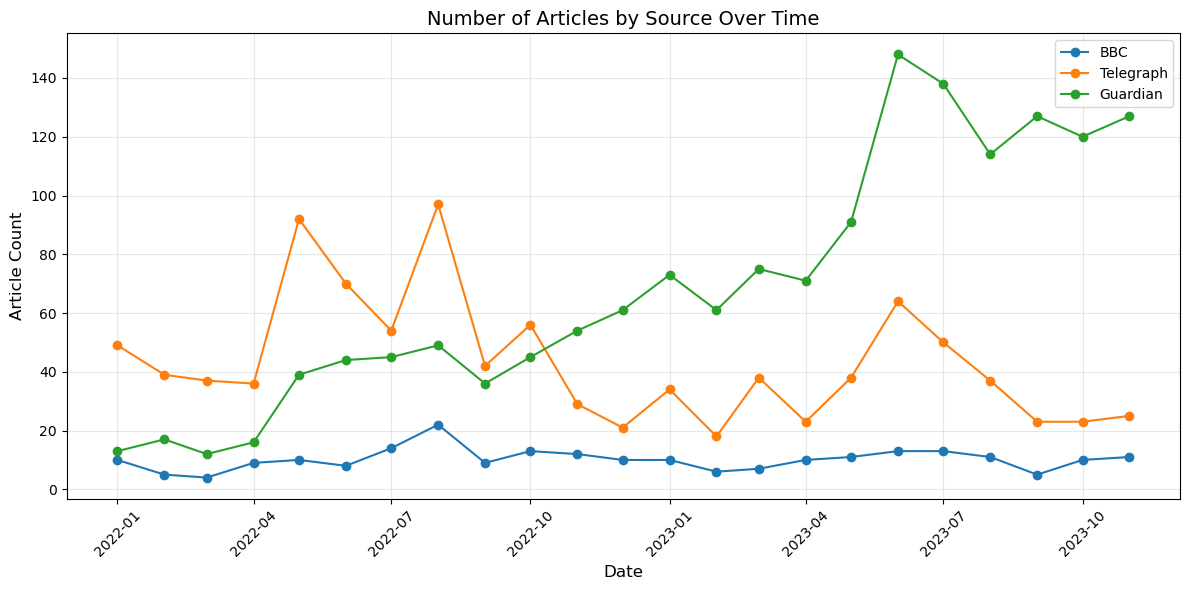

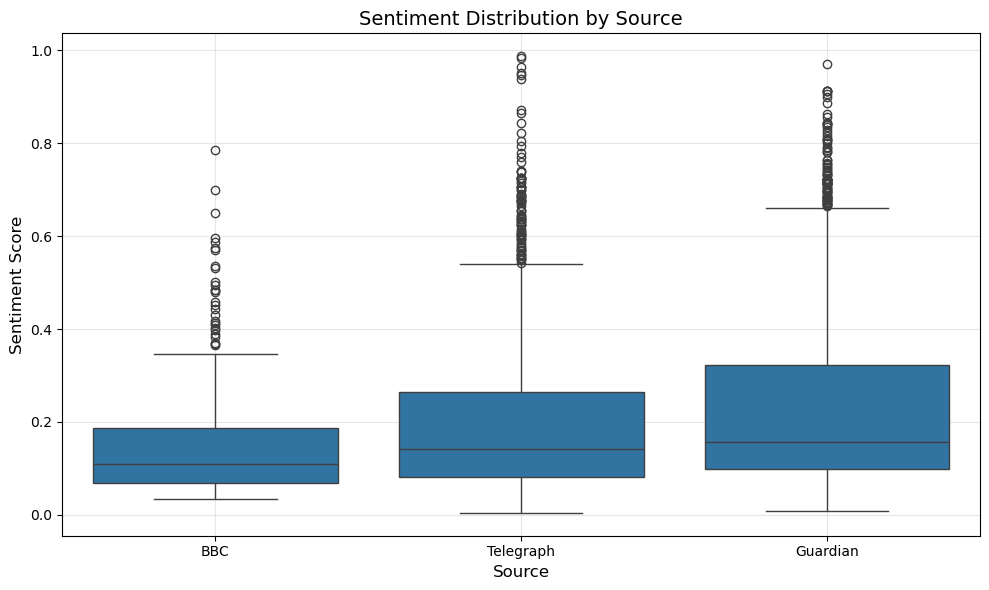

<Figure size 1200x800 with 0 Axes>

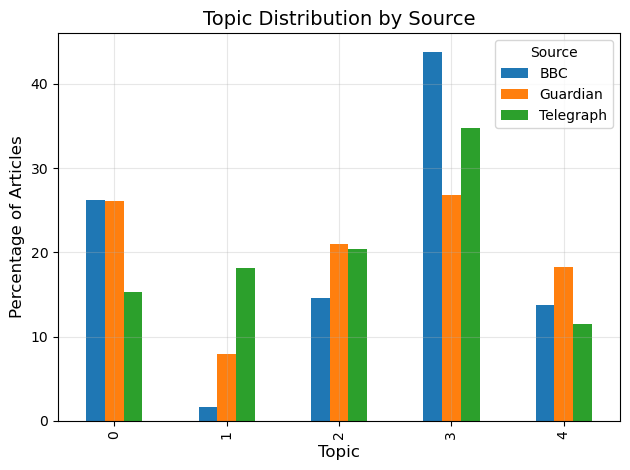

<Figure size 1200x800 with 0 Axes>

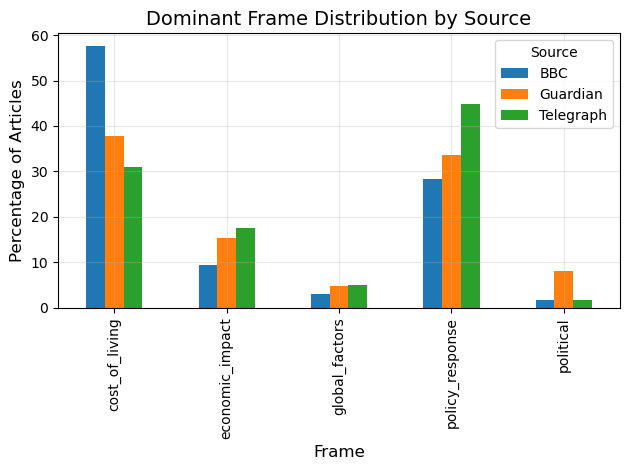

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from gensim import corpora
from gensim.models import LdaModel
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
print("Loading dataset...")
df = pd.read_csv('data/cleaned_articles_2022_2023.csv')
print(f"Dataset contains {len(df)} articles")

# Check if we need to preprocess dates
if not pd.api.types.is_datetime64_any_dtype(df['Publication Date']):
    df['Publication Date'] = pd.to_datetime(df['Publication Date'])

# Add year, month, quarter information
df['Year'] = df['Publication Date'].dt.year
df['Month'] = df['Publication Date'].dt.month
df['Quarter'] = df['Publication Date'].dt.quarter
df['YearQuarter'] = df['Year'].astype(str) + '-Q' + df['Quarter'].astype(str)

# 1. ARTICLE COUNT ANALYSIS
print("\n==== ARTICLE COUNT ANALYSIS ====")
# Count by source
source_counts = df['Source'].value_counts()
print("\nArticles by source:")
print(source_counts)

# Count by quarter and source
quarterly_counts = pd.crosstab(
    [df['Year'], df['Quarter']], 
    df['Source'], 
    margins=True, 
    margins_name='Total'
)
print("\nArticles by quarter and source:")
print(quarterly_counts)

# Plot article counts by source over time
plt.figure(figsize=(12, 6))
monthly_data = df.groupby(['Year', 'Month', 'Source']).size().reset_index(name='Count')
monthly_data['Date'] = pd.to_datetime(monthly_data[['Year', 'Month']].assign(day=1))

for source in df['Source'].unique():
    source_data = monthly_data[monthly_data['Source'] == source]
    plt.plot(source_data['Date'], source_data['Count'], marker='o', label=source)

plt.title('Number of Articles by Source Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Article Count', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('article_counts_by_time.png', dpi=300)
print("Saved article count visualization")

# 2. SENTIMENT ANALYSIS
print("\n==== SENTIMENT ANALYSIS ====")
# Use existing sentiment scores
print("Using existing sentiment scores")
df['Sentiment'] = df['Sentiment Score']

# Calculate average sentiment by source
sentiment_by_source = df.groupby('Source')['Sentiment'].agg(['mean', 'median', 'std']).round(3)
print("\nSentiment statistics by source:")
print(sentiment_by_source)

# Plot sentiment distribution by source
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source', y='Sentiment', data=df)
plt.title('Sentiment Distribution by Source', fontsize=14)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('sentiment_by_source.png', dpi=300)
print("Saved sentiment visualization")

# 3. BASIC TEXT PREPROCESSING FOR TOPIC MODELING
print("\n==== TEXT PREPROCESSING FOR ANALYSIS ====")
# Define stopwords manually without NLTK
stop_words = {
    'a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', 'as',
    'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can',
    'did', 'do', 'does', 'doing', 'don', 'down', 'during', 'each', 'few', 'for', 'from', 'further',
    'had', 'has', 'have', 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his',
    'how', 'i', 'if', 'in', 'into', 'is', 'it', 'its', 'itself', 'just', 'me', 'more', 'most', 'my',
    'myself', 'no', 'nor', 'not', 'now', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our',
    'ours', 'ourselves', 'out', 'over', 'own', 'same', 'she', 'should', 'so', 'some', 'such', 'than',
    'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this',
    'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 'was', 'we', 'were', 'what', 'when',
    'where', 'which', 'while', 'who', 'whom', 'why', 'will', 'with', 'would', 'you', 'your', 'yours',
    'yourself', 'yourselves',
    # Custom stopwords
    'says', 'said', 'mr', 'ms', 'mrs', 'told', 'according', 'reported',
    'reuters', 'afp', 'ap', 'would', 'could', 'may', 'might', 'also',
    'year', 'years', 'month', 'months', 'day', 'days', 'time', 'today',
    'yesterday', 'week', 'weeks', 'however', 'despite', 'although'
}

# Simple text preprocessing function without NLTK
def simple_preprocess(text):
    if not isinstance(text, str):
        return []
    
    # Lowercase and remove punctuation
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    
    # Tokenize simply by splitting on whitespace
    tokens = text.split()
    
    # Remove stopwords and short words
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    
    return tokens

# Apply preprocessing
print("Processing text for analysis...")
df['Tokens'] = df['Article_Text'].apply(simple_preprocess)
df['Token_Count'] = df['Tokens'].apply(len)

# Manually count word frequency for analysis
print("Counting word frequencies...")
word_counts = {}

# Count by source
for source in df['Source'].unique():
    source_tokens = []
    for tokens in df[df['Source'] == source]['Tokens']:
        source_tokens.extend(tokens)
    
    word_counts[source] = Counter(source_tokens)
    
    print(f"\nTop 20 words in {source}:")
    for word, count in word_counts[source].most_common(20):
        print(f"  {word}: {count}")

# 4. TOPIC MODELING WITH GENSIM LDA
print("\n==== TOPIC MODELING ====")
# Prepare corpus
print("Preparing corpus for topic modeling...")
dictionary = corpora.Dictionary(df['Tokens'])
# Filter extremes (adjust parameters as needed)
dictionary.filter_extremes(no_below=5, no_above=0.7)
corpus = [dictionary.doc2bow(text) for text in df['Tokens']]

# Use a fixed number of topics to save time
num_topics = 5
print(f"Training LDA model with {num_topics} topics...")
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    passes=10,
    alpha='auto',
    random_state=42
)

# Print topics
print("\nTop terms for each topic:")
for idx, topic in lda_model.print_topics(num_words=5):
    print(f"Topic #{idx}: {topic}")

# Get topic distribution for each document
topic_distributions = []
for i, bow in enumerate(corpus):
    topics = lda_model.get_document_topics(bow)
    # Get dominant topic
    dominant_topic = max(topics, key=lambda x: x[1]) if topics else (-1, 0)
    topic_distributions.append({
        'doc_id': i,
        'dominant_topic': dominant_topic[0],
        'dominant_topic_prob': dominant_topic[1],
        'topics': topics
    })

# Add dominant topic to dataframe
df['Dominant_Topic'] = [item['dominant_topic'] for item in topic_distributions]
df['Dominant_Topic_Prob'] = [item['dominant_topic_prob'] for item in topic_distributions]

# Analyze topic distribution by source
topic_by_source = pd.crosstab(
    df['Dominant_Topic'], 
    df['Source'], 
    normalize='columns'
).round(3) * 100

print("\nTopic distribution by source (%):")
print(topic_by_source)

# Plot topic distribution by source
plt.figure(figsize=(12, 8))
topic_by_source.plot(kind='bar')
plt.title('Topic Distribution by Source', fontsize=14)
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Percentage of Articles', fontsize=12)
plt.legend(title='Source')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('topic_by_source.png', dpi=300)
print("Saved topic distribution visualization")

# 5. BASIC FRAME ANALYSIS WITH KEYWORD DICTIONARIES
print("\n==== FRAME ANALYSIS ====")
# Define frame dictionaries (based on common frames for inflation coverage)
frames = {
    'economic_impact': [
        'economy', 'growth', 'recession', 'gdp', 'economic', 'market', 'markets',
        'investment', 'business', 'trade', 'sector', 'industry', 'industries',
        'financial', 'stock', 'stocks', 'investor', 'investors'
    ],
    
    'cost_of_living': [
        'cost', 'costs', 'price', 'prices', 'expensive', 'afford', 'affordable',
        'household', 'households', 'family', 'families', 'consumer', 'consumers',
        'bill', 'bills', 'shopping', 'energy', 'food', 'petrol', 'mortgage', 'rent'
    ],
    
    'policy_response': [
        'policy', 'policies', 'bank', 'central', 'interest', 'rate', 'rates',
        'monetary', 'fiscal', 'budget', 'treasury', 'chancellor', 'government',
        'minister', 'regulation', 'tax', 'taxes', 'spending', 'stimulus'
    ],
    
    'political': [
        'election', 'vote', 'voter', 'voters', 'political', 'politics', 'party',
        'conservative', 'labour', 'tory', 'tories', 'opposition', 'campaign',
        'mp', 'parliament', 'politician', 'politicians', 'sunak', 'starmer'
    ],
    
    'global_factors': [
        'global', 'international', 'world', 'worldwide', 'foreign', 'abroad',
        'europe', 'european', 'china', 'russia', 'ukraine', 'war', 'pandemic',
        'covid', 'supply', 'chain', 'shortage', 'shortages', 'climate'
    ]
}

# Function to detect frames in text without requiring NLTK
def detect_frames(tokens, frames_dict):
    # Convert all frame terms to lowercase for matching
    frame_terms = {
        frame: [term.lower() for term in terms]
        for frame, terms in frames_dict.items()
    }
    
    # Count matches for each frame
    frame_counts = {}
    token_set = set(tokens)  # For faster lookups
    
    for frame, terms in frame_terms.items():
        # Count how many terms from this frame appear in the tokens
        matches = sum(1 for term in terms if term in token_set)
        # Also count total occurrences
        occurrences = sum(tokens.count(term) for term in terms if term in token_set)
        
        frame_counts[frame] = {
            'count': matches,
            'occurrences': occurrences,
            'percentage': occurrences / len(tokens) if tokens else 0
        }
    
    # Determine dominant frame
    if frame_counts:
        dominant_frame = max(frame_counts.items(), key=lambda x: x[1]['occurrences'])
        return {
            'frame_counts': frame_counts,
            'dominant_frame': dominant_frame[0]
        }
    else:
        return {
            'frame_counts': frame_counts,
            'dominant_frame': 'none'
        }

# Apply frame detection
print("Detecting frames in articles...")
frame_results = df['Tokens'].apply(lambda x: detect_frames(x, frames))

# Extract frame data
df['Dominant_Frame'] = frame_results.apply(lambda x: x['dominant_frame'])

# Extract frame percentages
for frame in frames.keys():
    df[f'Frame_{frame}'] = frame_results.apply(
        lambda x: x['frame_counts'][frame]['percentage']
    )

# Analyze frame distribution by source
frame_by_source = pd.crosstab(
    df['Dominant_Frame'], 
    df['Source'], 
    normalize='columns'
).round(3) * 100

print("\nDominant frame distribution by source (%):")
print(frame_by_source)

# Plot frame distribution
plt.figure(figsize=(12, 8))
frame_by_source.plot(kind='bar')
plt.title('Dominant Frame Distribution by Source', fontsize=14)
plt.xlabel('Frame', fontsize=12)
plt.ylabel('Percentage of Articles', fontsize=12)
plt.legend(title='Source')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('frame_by_source.png', dpi=300)
print("Saved frame distribution visualization")

print("\nAnalysis complete! All visualizations saved.")

In [14]:
# Define a "social impact" frame dictionary
social_impact_frame = [
    'vulnerable', 'poor', 'poverty', 'family', 'families', 'household', 'households',
    'worker', 'workers', 'low-income', 'hardship', 'struggle', 'struggling', 'cost of living',
    'afford', 'affordability', 'inequality', 'welfare', 'benefit', 'benefits', 'crisis',
    'squeeze', 'hit', 'suffer', 'suffering', 'impact', 'foodbank', 'food bank'
]

# Count occurrences in each article
df['social_impact_count'] = df['Article_Text'].apply(
    lambda text: sum(text.lower().count(' ' + term + ' ') for term in social_impact_frame)
)

# Normalize by article length
df['social_impact_density'] = df['social_impact_count'] / df['Article_Text'].str.len() * 1000

# Statistical test
import scipy.stats as stats
guardian_density = df[df['Source'] == 'Guardian']['social_impact_density']
telegraph_density = df[df['Source'] == 'Telegraph']['social_impact_density']
bbc_density = df[df['Source'] == 'BBC']['social_impact_density']

# T-test Guardian vs Telegraph
t_stat, p_val = stats.ttest_ind(guardian_density, telegraph_density)
print(f"Guardian vs Telegraph social impact framing: t={t_stat:.3f}, p={p_val:.4f}")

# Calculate mean values
means = df.groupby('Source')['social_impact_density'].mean()
print("Social impact frame density by source:")
print(means)

Guardian vs Telegraph social impact framing: t=4.152, p=0.0000
Social impact frame density by source:
Source
BBC          1.061388
Guardian     1.149869
Telegraph    0.972082
Name: social_impact_density, dtype: float64


In [16]:
# Calculate percentage of articles that mention "cost of living crisis"
df['mentions_cost_of_living'] = df['Article_Text'].str.lower().str.contains('cost of living crisis')
cost_of_living_by_source = df.groupby('Source')['mentions_cost_of_living'].mean() * 100
print("Percentage of articles mentioning 'cost of living crisis':")
print(cost_of_living_by_source)

# Chi-square test for independence
from scipy.stats import chi2_contingency
contingency = pd.crosstab(df['Source'], df['mentions_cost_of_living'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-square test for 'cost of living crisis' mentions: chi2={chi2:.2f}, p={p:.4f}")

Percentage of articles mentioning 'cost of living crisis':
Source
BBC           9.442060
Guardian     26.332487
Telegraph    18.190955
Name: mentions_cost_of_living, dtype: float64
Chi-square test for 'cost of living crisis' mentions: chi2=47.00, p=0.0000


In [ ]:
# Define financial/policy frame dictionary
financial_policy_frame = [
    'market', 'markets', 'investor', 'investors', 'stock', 'financial', 'bank of england',
    'interest rate', 'interest rates', 'monetary policy', 'fiscal policy', 'treasury',
    'chancellor', 'budget', 'gilt', 'gilts', 'bond', 'bonds', 'currency', 'pound',
    'spending', 'debt', 'deficit', 'investment', 'growth', 'gdp', 'recession',
    'central bank', 'base rate', 'economy'
]

# Count occurrences
df['financial_policy_count'] = df['Article_Text'].apply(
    lambda text: sum(text.lower().count(' ' + term + ' ') for term in financial_policy_frame)
)

# Normalize by article length
df['financial_policy_density'] = df['financial_policy_count'] / df['Article_Text'].str.len() * 1000

# T-test Telegraph vs Guardian
t_stat, p_val = stats.ttest_ind(
    df[df['Source'] == 'Telegraph']['financial_policy_density'],
    df[df['Source'] == 'Guardian']['financial_policy_density']
)
print(f"Telegraph vs Guardian financial/policy framing: t={t_stat:.3f}, p={p_val:.4f}")

# Calculate mean values
means = df.groupby('Source')['financial_policy_density'].mean()
print("Financial/policy frame density by source:")
print(means)

Telegraph vs Guardian financial/policy framing: t=6.168, p=0.0000
Financial/policy frame density by source:
Source
BBC          1.761942
Guardian     1.857446
Telegraph    2.293862
Name: financial_policy_density, dtype: float64


In [17]:
# Count mentions of Bank of England, interest rates, and monetary policy
monetary_terms = ['bank of england', 'interest rate', 'monetary policy', 'andrew bailey']
df['monetary_mentions'] = df['Article_Text'].apply(
    lambda text: sum(text.lower().count(term) for term in monetary_terms)
)

means = df.groupby('Source')['monetary_mentions'].mean()
print("Average mentions of monetary policy terms by source:")
print(means)

Average mentions of monetary policy terms by source:
Source
BBC          2.000000
Guardian     1.780457
Telegraph    3.492462
Name: monetary_mentions, dtype: float64


In [18]:
# Calculate how many different frames each article uses
all_frames = social_impact_frame + financial_policy_frame
# Add any missing frames like global factors
global_factors_frame = ['global', 'international', 'supply chain', 'ukraine', 'russia', 'pandemic', 'covid']
all_frames += global_factors_frame

# Count distinct frames in each article
def count_distinct_frames(text, frame_list):
    text = text.lower()
    return sum(1 for term in frame_list if term in text)

df['frame_diversity'] = df['Article_Text'].apply(lambda x: count_distinct_frames(x, all_frames))

# Compare diversity across sources
means = df.groupby('Source')['frame_diversity'].mean()
print("Frame diversity by source (higher = more balanced):")
print(means)

# ANOVA test to compare all three sources
from scipy.stats import f_oneway
f_stat, p_val = f_oneway(
    df[df['Source'] == 'BBC']['frame_diversity'],
    df[df['Source'] == 'Guardian']['frame_diversity'],
    df[df['Source'] == 'Telegraph']['frame_diversity']
)
print(f"ANOVA for frame diversity: F={f_stat:.3f}, p={p_val:.4f}")

Frame diversity by source (higher = more balanced):
Source
BBC          11.218884
Guardian     11.976523
Telegraph    13.762814
Name: frame_diversity, dtype: float64
ANOVA for frame diversity: F=27.206, p=0.0000


In [19]:
# Calculate absolute deviation from neutral sentiment (0.5)
df['sentiment_deviation'] = abs(df['Sentiment Score'] - 0.5)

# Lower values indicate more neutral sentiment
means = df.groupby('Source')['sentiment_deviation'].mean()
print("Sentiment deviation from neutral (lower = more neutral):")
print(means)

# T-tests to compare BBC neutrality
t_stat_bbc_g, p_val_bbc_g = stats.ttest_ind(
    df[df['Source'] == 'BBC']['sentiment_deviation'],
    df[df['Source'] == 'Guardian']['sentiment_deviation']
)
print(f"BBC vs Guardian sentiment neutrality: t={t_stat_bbc_g:.3f}, p={p_val_bbc_g:.4f}")

t_stat_bbc_t, p_val_bbc_t = stats.ttest_ind(
    df[df['Source'] == 'BBC']['sentiment_deviation'],
    df[df['Source'] == 'Telegraph']['sentiment_deviation']
)
print(f"BBC vs Telegraph sentiment neutrality: t={t_stat_bbc_t:.3f}, p={p_val_bbc_t:.4f}")

Sentiment deviation from neutral (lower = more neutral):
Source
BBC          0.346118
Guardian     0.302799
Telegraph    0.320704
Name: sentiment_deviation, dtype: float64
BBC vs Guardian sentiment neutrality: t=4.842, p=0.0000
BBC vs Telegraph sentiment neutrality: t=2.831, p=0.0047


Comprehensive results table:
           Social Impact Frame  Financial/Policy Frame  Frame Diversity  \
Source                                                                    
BBC                     1.0614                  1.7619          11.2189   
Guardian                1.1499                  1.8574          11.9765   
Telegraph               0.9721                  2.2939          13.7628   

           Average Sentiment  Sentiment Deviation  Cost of Living Mentions %  \
Source                                                                         
BBC                   0.1627               0.3461                     9.4421   
Guardian              0.2370               0.3028                    26.3325   
Telegraph             0.2113               0.3207                    18.1910   

           Monetary Policy Mentions  
Source                               
BBC                          2.0000  
Guardian                     1.7805  
Telegraph                    3.4925  
Save

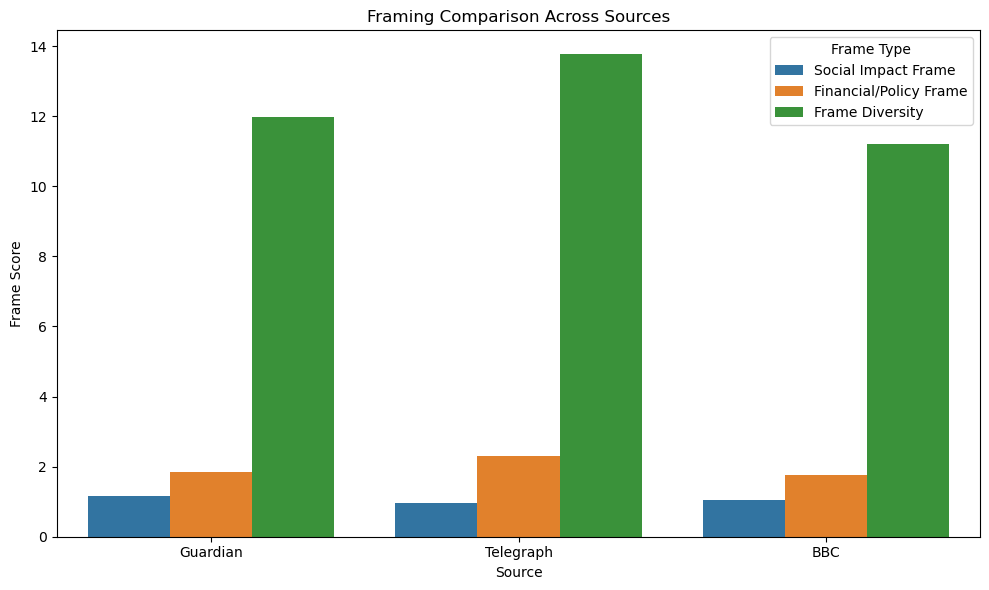

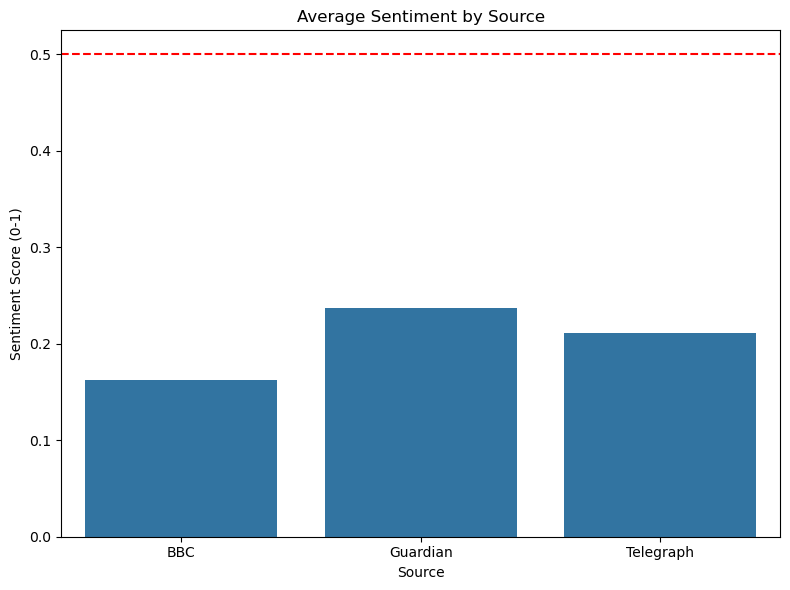

In [20]:
# Create a comprehensive comparative table
results = pd.DataFrame({
    'Social Impact Frame': df.groupby('Source')['social_impact_density'].mean(),
    'Financial/Policy Frame': df.groupby('Source')['financial_policy_density'].mean(),
    'Frame Diversity': df.groupby('Source')['frame_diversity'].mean(),
    'Average Sentiment': df.groupby('Source')['Sentiment Score'].mean(),
    'Sentiment Deviation': df.groupby('Source')['sentiment_deviation'].mean(),
    'Cost of Living Mentions %': df.groupby('Source')['mentions_cost_of_living'].mean() * 100,
    'Monetary Policy Mentions': df.groupby('Source')['monetary_mentions'].mean()
})

print("Comprehensive results table:")
print(results.round(4))

# Visualize the key differences
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
plot_data = results.loc[['Guardian', 'Telegraph', 'BBC'], 
                        ['Social Impact Frame', 'Financial/Policy Frame', 'Frame Diversity']]
plot_data = plot_data.reset_index()
plot_data = pd.melt(plot_data, id_vars=['Source'], var_name='Frame Type', value_name='Score')

# Create plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Source', y='Score', hue='Frame Type', data=plot_data)
plt.title('Framing Comparison Across Sources')
plt.ylabel('Frame Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('framing_comparison.png', dpi=300)
print("Saved framing comparison visualization")

# Create sentiment comparison plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Source', y='Average Sentiment', data=results.reset_index())
plt.title('Average Sentiment by Source')
plt.axhline(y=0.5, color='r', linestyle='--', label='Neutral')
plt.ylabel('Sentiment Score (0-1)')
plt.tight_layout()
plt.savefig('sentiment_comparison.png', dpi=300)
print("Saved sentiment comparison visualization")